# __PERBAIKAN JADWAL ROYALTRANS SESUAI POLA DAN KEBUTUHAN PENGGUNA__

# __1. Pendahuluan__
## 1.1 Latar Belakang
TransJakarta adalah layanan sistem transportasi umum baik berbasis bus rapid transit (BRT) maupun bus kecil / angkutan umum yang beroperasi di Jakarta. TransJakarta dikelola oleh Pemerintah Provinsi DKI Jakarta serta di bawah naungan Dinas Perhubungan DKI Jakarta sehingga pendanaan berasal dari anggaran pemerintah termasuk subsidi untuk tarif. TransJakarta bertujuan untuk mengurangi kemacetan atau ketergantungan pada kendaraan pribadi dan memberikan alternatif transportasi yang cepat dan efisien bagi warga Jakarta.

Fitur Utama:
1. Korridor / corridor: Terdapat beberapa koridor yang menghubungkan berbagai wilayah di Jakarta.
2. Halte / stops: Halte-halte TransJakarta dirancang untuk memberikan akses mudah dan nyaman bagi penumpang.
3. Tiket / payment: Sistem pembayaran menggunakan tiket elektronik atau kartu, memudahkan proses naik dan turun.

## 1.2 Permasalahan
Mengembalikan fitur utama TransJakarta yaitu melayanin rute-rute strategis, termasuk area perkantoran, pusat perbelanjaan dan pemukiman untuk mengurangi penggunaan kendaraan pribadi, utamanya pada rute-rute jauh. Mengingat sebagian besar pengguna kendaraan pribadi yang menyumbangkan kemacetan di ibukota dan sekitarnya adalah warga yang berdomisili tinggal di daerah pinggiran kota Jakarta namun bekerja di sekitar Jakarta. 

Tim Data Analis Dinas Perhubungan DKI Jakarta diminta menganalisis data penggunaan TransJakarta pada 1 bulan yaitu April 2023, khususnya pada rute RoyalTrans agar moda ini menjadi pilihan utama bagi warga yang berdomisili di luar wilayah sekitar Jakarta yang bekerja di Jakarta.
Di antaranya:
1. Melihat kebutuhan warga / pengguna melalui traffic per `corridor` / rute, melalui pola kebiasaan pengguna Royaltrans.
2. Perbaikan jadwal per `corridor` / rute agar dapat mengakomodir permintaan / kebutuhan warga pengguna. 


# __2. Data__
Untuk menjawab permasalahan di atas, Tim Data Analis akan menganalisis data penggunaan TransJakarta April 2023. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/hieremiaskevin/pt-transjakarta-dataset-april-2023).

## 2.1 Tinjauan Data
Data set berisi 22 kolom yang menjelaskan informasi:
- transID           : ID transaksi unik untuk setiap transaksi
- payCardID         : Identifikasi utama pelanggan. Kartu yang pelanggan gunakan sebagai tiket masuk dan keluar.
- payCardBank       : Nama bank penerbit kartu pelanggan
- payCardName       : Nama pelanggan yang tercetak di kartu.
- payCardSex        : Jenis kelamin pelanggan yang tercetak di kartu
- payCardBirthDate  : Tahun kelahiran pelanggan
- corridorID        : ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.
- corridorName      : Nama Koridor / Nama Rute yang berisi Titik Awal dan Titik Akhir untuk setiap rute.
- direction         : 0 untuk Pergi, 1 untuk Kembali. Arah rute.
- tapInStops        : ID Halte Tap In (masuk) untuk mengidentifikasi nama halte
- tapInStopsName    : Nama Halte Tap In (masuk) di mana pelanggan melakukan tap in.
- tapInStopsLat     : Garis lintang (Latitude) Halte Tap In
- tapInStopsLon     : Garis bujur (Longitude) Halte Tap In
- stopStartSeq      : Urutan dari halte, halte pertama, halte kedua, dan seterusnya. Terkait dengan arah.
- tapInTime         : Waktu tap in. Tanggal dan waktu
- tapOutStops       : ID Halte Tap Out (keluar) untuk mengidentifikasi nama halte
- tapOutStopsName   : Nama Halte Tap Out (keluar) di mana pelanggan melakukan tap out.
- tapOutStopsLat    : Garis lintang (Latitude) Halte Tap Out
- tapOutStopsLon    : Garis bujur (Longitude) Halte Tap Out
- stopEndSeq        : Urutan dari halte, halte pertama, halte kedua, dan seterusnya. Terkait dengan arah.
- tapOutTime        : Waktu tap out. Tanggal dan waktu
- payAmount         : Jumlah yang dibayarkan oleh pelanggan. Ada yang gratis. Ada yang tidak.

## 2.2 Import Library
Berikut ini library yang dipakai dalam analisis data

In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go


plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

## 2.3 Load Dataset

In [662]:
import os

path_dir_local = r"C:\Users\wisar\Downloads\capstone module 2"
file_name = r"Transjakarta.csv"

with open(os.path.join(path_dir_local,file_name), 'r') as file:
    csv = file.read()

df = pd.read_csv(os.path.join(path_dir_local, file_name))
df = pd.read_csv('Transjakarta.csv')
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


### 2.3.1 Informasi Dataset

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

### 2.3.2 Informasi statistik Dataset

In [664]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [665]:
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(),df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unik', 'Unique Sample'],data=listItem)
tabel1Desc

,Nama Kolom,Jumlah Unik,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana, S.H.,

Secara umum, dataset TransJakarta April 2023:
* Memiliki 21 kolom dan 37.899 baris
* Beberapa kolom terdapat missing values dengan jumlah cukup besar
* Kolom `tapInTime` dan `tapOutTime` masih bertype object, selanjutnya type data pada kolom ini diubah menjadi datetime
* Pada tabel Unique value terdapat jenin-jenis data unik yang terdapat pada setiap kolom
* Perlu diidentifikasi jenis kendaraan berdasarkan corridorID apakah BRT, RoyalTrans, atau MikroTrans.

## 2.4 Pemahaman Data dan Pembersihan Data

##### __2.4.1 Mengubah kolom tapInTime dan tapOutTime dari jenis data object ke datetime__

In [666]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

##### __2.4.2 Korelasi Antar Kolom__
Keterhubungan / korelasi antar kolom dapat dilakukan melalui visualisasi berdasarkan heatmap.

__Nilai Korelasi__

1. Korelasi Positif (0 hingga 1):
0: Tidak ada hubungan antara variabel.
1: Hubungan positif sempurna; jika satu variabel meningkat, yang lain juga pasti meningkat.

2. Korelasi Negatif (-1 hingga 0):
0: Tidak ada hubungan antara variabel.
-1: Hubungan negatif sempurna; jika satu variabel meningkat, yang lain pasti menurun.

__Interpretasi Umum__
1. Korelasi Positif: Kedua variabel bergerak dalam arah yang sama. Semakin Dekat ke 1: Hubungan positif yang kuat, menunjukkan bahwa perubahan pada satu variabel diikuti oleh perubahan pada variabel lainnya dalam arah yang sama.

2. Korelasi Negatif: Kedua variabel bergerak dalam arah yang berlawanan. Semakin Dekat ke -1: Hubungan negatif yang kuat, menunjukkan bahwa perubahan pada satu variabel diikuti oleh perubahan pada variabel lainnya dalam arah yang berlawanan.


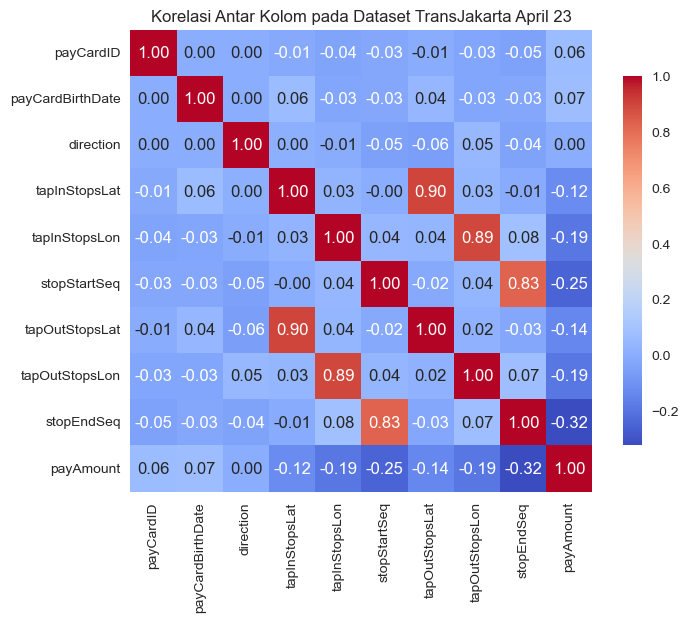

In [667]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Korelasi Antar Kolom pada Dataset TransJakarta April 23')
plt.show()


Korelasi Positif
1. tapInStopsLat berkorelasi positif dengan tapOutStopsLat begitupun sebaliknya
2. tapInStopsLon berkorelasi positif dengan tapOutStopsLon begitupun sebaliknya
3. stopStartSeq berkorelasi positif dengan stopEndSeq begitupun sebaliknya

Korelasi Negatif
1. payAmount berkolerasi negatif dengan stopEndSeq, stopStartSeq, tapOutStopsLon, tapOutStopsLat

__Uji Chi Square untuk variable pada kolom `tapInStops`, `corridorName`, dan `tapOutStops`__

In [668]:
from scipy.stats import chi2_contingency
# Buat tabel kontingensi berdasarkan tapInStops, corridorName, dan tapOutStops
# Hanya untuk nilai yang tidak null di tapOutStops
df_not_null = df.dropna(subset=['tapOutStops'])
contingency_table = pd.crosstab([df_not_null['tapInStops'], df_not_null['corridorName']], df_not_null['tapOutStops'])

# Lakukan uji chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Hasil uji chi-square
print(f"Chi2: {chi2}")
print(f"P-value: {p}")

# Jika P-value < 0.05, berarti ada hubungan antara tapInStops, corridorName, dan tapOutStops
if p < 0.05:
    print("Ada hubungan yang signifikan antara tapInStops, corridorName, dan tapOutStops")
else:
    print("Tidak ada hubungan yang signifikan antara tapInStops, corridorName, dan tapOutStops")

# Jika hubungan ditemukan signifikan, isi nilai yang hilang berdasarkan tapInStops dan corridorName
def fill_missing_tapOut(row):
    if pd.isna(row['tapOutStops']):
        similar_rows = df[(df['tapInStops'] == row['tapInStops']) & (df['corridorName'] == row['corridorName'])]
        most_common_tapOut = similar_rows['tapOutStops'].mode()
        if len(most_common_tapOut) > 0:
            return most_common_tapOut[0]
    return row['tapOutStops']

df['tapOutStops'] = df.apply(fill_missing_tapOut, axis=1)

Chi2: 60409043.71192009
P-value: 0.0
Ada hubungan yang signifikan antara tapInStops, corridorName, dan tapOutStops


__Uji Chi Square untuk variable pada kolom `stopEndSeq`, `corridorID`, `tapInStops` dan `tapOutStops`__

In [669]:
contingency_table1 = pd.crosstab(index=[df['corridorID'], df['tapInStops'], df['tapOutStops']],
                                 columns=df['stopEndSeq'])

# Melakukan uji chi-square
chi2, p, _, _ = chi2_contingency(contingency_table1)

# Menampilkan hasil
alpha = 0.05
print(f'Chi-square statistic: {chi2}, p-value: {p}')

if p < alpha:
    print("Tolak hipotesis nol (ada hubungan yang signifikan)")
else:
    print("Gagal tolak hipotesis nol (tidak ada hubungan yang signifikan)")

Chi-square statistic: 2483132.141107952, p-value: 0.0
Tolak hipotesis nol (ada hubungan yang signifikan)


##### __2.4.3 Missing Values__

Presentase Missing values pada tiap-tiap kolom:
1. corridorID = 2.9%
2. corridorName = 2.9%
3. tapInStops = 0.09%
4. tapOutStops 0.13%
5. tapOutStopsName = 0.09%
6. tapOutStopsLat = 0.09%
7. tapOutStopsLon = 0.09%
8. stopEndSeq = 3.54%
9. tapOutTime = 3.54%
10. payAmount = 2.65%


In [670]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         0.788918
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

Jumlah Missing Values per kolom:

In [671]:
df.isnull().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops          299
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Tidak terdapat data duplicate

In [672]:
df[df.duplicated()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


##### __2.4.4 Handling Missing Values__
1. Kolom `corridorID` dan `corridorName` saling terkait, missing values pada kolom `corridorID` dan `corridorName` dapat saling mengisi
2. Kolom `tapInStops` dan `tapInStopsName` saling terkait, missing values pada kolom `tapInStops` dapat diisi berdasarkan `tapInStopsName`
3. Kolom `tapOutStops` dan `tapOutStopsName` saling terkait, missing values pada kolom `tapOutStops` dapat diisi berdasarkan `tapOutStopsName`
4. Sesuai dengan heatmap (korelasi kolom numerik), `tapInStopsLat` berkorelasi positif dengan `tapOutStopsLat` begitupun sebaliknya, serta `tapInStopsLon` berkorelasi positif dengan `tapOutStopsLon` dan sebaliknya, sehingga missing values pada kolom `tapOutStops` sebesar __0.13%__ dapat diminimalisasi dengan pengisian data berdasarkan data penumpang / pengguna dengan rute yang sama (mengambil nilai dari baris lengkap pertama). Mengasumsikan bahwa penumpang yang naik (`tapInStops`) dari halte A dengan armada rute B akan turun (`tapOutStops`) di halte C.
5. Kolom `stopEndSeq`, sebesar __3.5%__ dapat diidentifikasi berdasarkan `corridorID`, `direction`, dan `tapOutStops`.
6. Kolom `payAmount` dapat diidentifikasi berdasarkan klasifikasi `corridorID` yang dilakukan lebih lanjut, apakah jenis moda BRT (termasuk rute Transjabodetabek), RoyalTrans, atau MikroTrans karena memiliki kategori tarif yang berbeda.

In [673]:
# Mengisi corridorID yang kosong berdasarkan corridorName
for name in df['corridorName'].unique():
    # Ambil nama corridor yang ada untuk stop ini
    corridor_ids = df.loc[df['corridorName'] == name, 'corridorID'].dropna().unique()
    
    if len(corridor_ids) > 0:
        # Jika ada nama corridor yang ditemukan, isi yang kosong dengan fillna
        df.loc[df['corridorName'] == name, 'corridorID'] = df.loc[df['corridorName'] == name, 'corridorID'].fillna(corridor_ids[0])

# Mengisi corridorName yang kosong berdasarkan corridorID
for id in df['corridorID'].unique():
    # Ambil nama corridor yang ada untuk stop ini
    corridor_names = df.loc[df['corridorID'] == id, 'corridorName'].dropna().unique()
    
    if len(corridor_names) > 0:
        # Jika ada nama corridor yang ditemukan, isi yang kosong dengan fillna
        df.loc[df['corridorID'] == id, 'corridorName'] = df.loc[df['corridorID'] == id, 'corridorName'].fillna(corridor_names[0])

# Mengisi tapInStops yang kosong berdasarkan tapInStopsName
for stopsName in df['tapInStopsName'].unique():
    # Ambil nama corridor yang ada untuk stop ini
    tapIn_Stops = df.loc[df['tapInStopsName'] == stopsName, 'tapInStops'].dropna().unique()
    
    if len(tapIn_Stops) > 0:
        # Jika ada nama tapInStops yang ditemukan, isi yang kosong dengan fillna
        df.loc[df['tapInStopsName'] == stopsName, 'tapInStops'] = df.loc[df['tapInStopsName'] == stopsName, 'tapInStops'].fillna(tapIn_Stops[0])       

# Mengisi tapOutStops yang kosong berdasarkan tapOutStopsName
for stopOutName in df['tapOutStopsName'].unique():
    # Ambil nama halte yang ada untuk stop ini
    tapOut_Stops = df.loc[df['tapOutStopsName'] == stopOutName, 'tapOutStops'].dropna().unique()
    
    if len(tapOut_Stops) > 0:
        # Jika ada nama tapOutStops yang ditemukan, isi yang kosong dengan fillna
        df.loc[df['tapOutStopsName'] == stopOutName, 'tapOutStops'] = df.loc[df['tapOutStopsName'] == stopOutName, 'tapOutStops'].fillna(tapOut_Stops[0])       

# Mengisi baris tapOutStops berdasarkan data penumpang / pengguna dengan rute yang sama (mengambil nilai dari baris lengkap pertama).
for stop in df['tapInStops'].unique():
    # Ambil baris yang lengkap untuk stop ini
    complete_rows = df[df['tapInStops'] == stop].dropna(subset=['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon'])
    
    if not complete_rows.empty:
        # Ambil nilai dari baris lengkap pertama
        first_complete_row = complete_rows.iloc[0]
        
        # Isi nilai yang kosong
        df.loc[(df['tapInStops'] == stop) & (df['tapOutStops'].isnull()), 'tapOutStops'] = first_complete_row['tapOutStops']
        df.loc[(df['tapInStops'] == stop) & (df['tapOutStopsName'].isnull()), 'tapOutStopsName'] = first_complete_row['tapOutStopsName']
        df.loc[(df['tapInStops'] == stop) & (df['tapOutStopsLat'].isnull()), 'tapOutStopsLat'] = first_complete_row['tapOutStopsLat']
        df.loc[(df['tapInStops'] == stop) & (df['tapOutStopsLon'].isnull()), 'tapOutStopsLon'] = first_complete_row['tapOutStopsLon']


__Handling Missing Values pada kolom `stopEndSeq`__

Handling missing values pada kolom `stopEndSeq` berhubungan dengan kolom `corridorID`, `corridorName`, `direction` dan `tapOutStops`:
1. Identifikasi nilai direction (0 dan 1) yang identik pada setiap corridorID dan corridorName.
2. Untuk setiap kombinasi yang identik, isikan nilai stopEndSeq yang sama untuk tapOutStops yang sama.

In [674]:
def fill_missing_stopEndSeq(group):
    # Ambil nilai stopEndSeq yang ada
    known_values = group[group['stopEndSeq'].notna()]
    
    # Jika ada nilai yang diketahui, isikan nilai tersebut ke yang hilang
    if not known_values.empty:
        group['stopEndSeq'] = group['stopEndSeq'].fillna(known_values['stopEndSeq'].mode()[0])
    
    return group

# Group berdasarkan corridorID, corridorName, dan tapOutStops, lalu isi nilai yang hilang

df_filled = df.groupby(['corridorID', 'corridorName', 'direction', 'tapOutStops'], group_keys=False).apply(fill_missing_stopEndSeq)
df = df_filled

In [675]:
# Mengecek jumlah missing values
print("\nJumlah missing values:")
print(df.isnull().sum())


Jumlah missing values:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            31
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq            68
tapOutTime          1262
payAmount            978
dtype: int64


masih terdapat beberapa missing values:
1. Pada `corridorID` dan `corridorName` (<1% keseluruhan data, maka diasumsikan tidak akan mempengaruhi representasi data, sehingga dilakukan penghapusan data tersebut agar lebih valid).

2. Selain itu, terdapat 34 missing values pada `tapInStops` dan dilakukan hal serupa (penghapusan data, karena jumlah missing values di bawah 1%), missing values ini tidak dapat diisikan dikarenakan tidak dapat kesamaan pada baris yang bernilai sama pada `tapInStopsName`.

3. Masih terdapat 68 missing values pada `stopEndSeq`, hal ini tidak dapat ditangani karena tidak ada kombinasi identik antara `corridorID`, `corridorName`, `direction`, dan `tapOutStopName` yang sama.

Sebelum dilakukan penghapusan, dilakukan uji terlebih dahulu. Apakah mempengaruhi data atau tidak, apabila tidak berpengaruh maka dapat dilakukan penghapusan dan menggunakan data yang sudah dilakukan penghapusan missing values tersebut untuk selanjutnya.

In [676]:
# Tampilkan nama kolom untuk memeriksa kolom yang ada
print("Nama kolom dalam DataFrame:", df.columns.tolist())

# Simpan DataFrame sebelum penghapusan
df_before_cleanup = df.copy()

# Menghitung persentase missing values
missing_before = df.isnull().mean() * 100
print("Missing values sebelum penghapusan:\n", missing_before)

# Memeriksa apakah kolom yang akan diuji ada
if 'stopEndSeq' in df.columns and df_before_cleanup['stopEndSeq'].notna().any():
    group_before = df_before_cleanup['stopEndSeq'].dropna()
    
    # Menghapus missing values pada corridorID, corridorName, tapInStops
    for column in ['corridorID', 'corridorName', 'tapInStops']:
        if column in df.columns and missing_before[column] < 1:
            df = df.dropna(subset=[column])

    # Memeriksa ukuran DataFrame setelah penghapusan
    total_rows_after = df.shape[0]
    
    # Lakukan t-test untuk group setelah penghapusan
    group_after = df['stopEndSeq'].dropna()
    
    # Lakukan uji t-test
    t_stat, p_value = stats.ttest_ind(group_before, group_after, equal_var=False)
    
    print("T-Test results sebelum penghapusan:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    # Menentukan signifikansi
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")
else:
    print("The column 'stopEndSeq' does not exist or has no numeric data.")

# Menghapus missing values pada stopEndSeq jika ada
df = df.dropna(subset=['stopEndSeq'])

# Memeriksa ukuran DataFrame setelah semua penghapusan
total_rows_final = df.shape[0]
print("Ukuran DataFrame setelah penghapusan missing values:", total_rows_final)


Nama kolom dalam DataFrame: ['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']
Missing values sebelum penghapusan:
 transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          0.000000
corridorName        0.000000
direction           0.000000
tapInStops          0.084409
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         0.000000
tapOutStopsName     0.000000
tapOutStopsLat      0.000000
tapOutStopsLon      0.000000
stopEndSeq          0.185155
tapOutTime       

setelah dilakukan uji, ditemukan hasil, bahwa tidak ada perubahan signifikan seteleh dilakukan penghapusan tiap baris yang berisi missing values, maka untuk merepresentasikan analisis data yang lebih akurat, dilakukan penghapusan tiap baris pada yang memiliki missing values di kolomnya.

In [677]:
columns_to_drop = ['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 
                   'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']

df_cleaned = df.dropna(subset=columns_to_drop)

__Membuat Kolom Baru `Moda` untuk Identifikasi Moda transportasi BRT, MikroTrans dan RoyalTrans berdasarkan `corridorID` untuk menentukan payAmount__

Identifikasi corridor khusus Royaltrans berdasarkan website resmi Transjakarta <https://transjakarta.co.id/layanan/royaltrans>

In [678]:
# Daftar corridorID untuk Royaltrans
royaltrans_ids = ['1K', 'B13', 'D32', 'S14', '1T', 'B14', 'S12', 'S31', '6P', 'D31', 'S13', 'T21']

# Fungsi untuk menentukan moda
def identify_moda(corridor_id):
    if isinstance(corridor_id, str):  # Memastikan corridor_id adalah string
        if corridor_id.startswith('JAK'):
            return 'Mikrotrans'
        elif corridor_id in royaltrans_ids:
            return 'Royaltrans'
        else:
            return 'BRT/Feeder/Transjabodetabek'
df_cleaned['Moda'] = df_cleaned['corridorID'].apply(identify_moda)

__Handling missing values pada kolom payAmount berdasarkan kolom `Moda`__

pengisian kolom `payAmount` yang kosong berdasarkan jenis `Moda` sebagai berikut:
1. `payAmount` 3500 - `moda` BRT/Feeder/Transjabodetabek
2. `payAmount` 20000 - `moda` Royaltrans
3. `payAmount` 0 - `moda` Mikrotrans

In [679]:
def fill_pay_amount(row):
    if pd.isna(row['payAmount']):
        if row['Moda'] == 'BRT/Feeder/Transjabodetabek':
            return 3500
        elif row['Moda'] == 'Royaltrans':
            return 20000
        elif row['Moda'] == 'Mikrotrans':
            return 0
    return row['payAmount']

# Menerapkan fungsi untuk mengisi nilai kosong
df_cleaned['payAmount'] = df_cleaned.apply(fill_pay_amount, axis=1)

#### __2.4.5 Data yang telah dibersihkan__

In [680]:
df_cleaned

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Moda
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,BRT/Feeder/Transjabodetabek
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,BRT/Feeder/Transjabodetabek
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,BRT/Feeder/Transjabodetabek
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,BRT/Feeder/Transjabodetabek
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,BRT/Feeder/Transjabodetabek
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,BRT/Feeder/Transjabodetabek
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,BRT/Feeder/Transjabodetabek
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,Royaltrans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,Mikrotrans


Pengecekan sisa missing values

In [681]:
# Mengecek jumlah missing values
print("\nJumlah missing values:")
print(df_cleaned.isnull().sum())


Jumlah missing values:
transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime          1194
payAmount              0
Moda                   0
dtype: int64


In [682]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36627 entries, 0 to 37899
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36627 non-null  object        
 1   payCardID         36627 non-null  int64         
 2   payCardBank       36627 non-null  object        
 3   payCardName       36627 non-null  object        
 4   payCardSex        36627 non-null  object        
 5   payCardBirthDate  36627 non-null  int64         
 6   corridorID        36627 non-null  object        
 7   corridorName      36627 non-null  object        
 8   direction         36627 non-null  float64       
 9   tapInStops        36627 non-null  object        
 10  tapInStopsName    36627 non-null  object        
 11  tapInStopsLat     36627 non-null  float64       
 12  tapInStopsLon     36627 non-null  float64       
 13  stopStartSeq      36627 non-null  int64         
 14  tapInTime         36627 non

In [683]:
listItem = []
for col in df_cleaned.columns:
    listItem.append([
        col,
        df_cleaned[col].dtype,
        df_cleaned[col].isna().sum(),
        df_cleaned[col].nunique(),
        list(df_cleaned[col].drop_duplicates().sample(2).values)
    ])

# Membuat DataFrame deskripsi
df_cleanedDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
    data=listItem
)

# Menampilkan bentuk DataFrame
print(df_cleaned.shape)
df_cleanedDesc


(36627, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,36627,"[GOXR218R6W22KS, JVZP547C9U32JP]"
1,payCardID,int64,0,1981,"[502079867680, 3523565456909732]"
2,payCardBank,object,0,6,"[flazz, brizzi]"
3,payCardName,object,0,1974,"[Septi Kusumo, Tgk. Rika Riyanti, S.Sos]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1974, 1962]"
6,corridorID,object,0,221,"[6U, JAK.53]"
7,corridorName,object,0,216,"[Term. Tj. Priok - Pegangsaan II IGI, Rusun Pinus Elok - Rusun Pulo Gebang]"
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,0,2492,"[P00033, B04273P]"


# __3. Analisis Data moda Royaltrans__

![Gambar Contoh](https://transjakarta.co.id/aset/gambar/armada/royal.png)

__Tinjauan Singkat__
- Royaltrans merupakan layanan bus premium yang menawarkan kenyamanan dan fasilitas lengkap untuk menunjang mobilitas di Jakarta.
- Memiliki kapasitas 30 orang per bus (seluruh penumpang duduk, tidak berdiri)
- Harga tiket bus Rp. 20.000
- Pemesanan tiket dilakukan melalui aplikasi TiJe, H-1 dari jadwal keberangkatan (maksimal pukul 22.00) untuk keberangkatan di pagi hari, dan di hari yang sama (H+0) maksimal pukul 10.00 untuk keberangkatan di sore hari. 

referensi: https://oto.detik.com/oto-galeri/d-6485643/ini-lho-fasilitas-nyaman-bus-royaltrans/1


Sesuai dengan pernyataan permasalahan, untuk tugas objektif dilakukan limitasi pada studi kasus __Royaltrans__.

Filter kolom spesifik `Moda`: __Royaltrans__

In [684]:
df_royaltrans = df_cleaned[df_cleaned['Moda'] == 'Royaltrans']
df_royaltrans

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,Moda
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,Royaltrans
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0,Royaltrans
60,RHUT145C1U25ZY,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,1.0,B00589P,GBK Pintu 7,-6.222095,106.80861,3,2023-04-03 05:43:48,B02556P,Palem Semi 1,-6.218812,106.61807,14.0,2023-04-03 06:09:12,20000.0,Royaltrans
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,Menara Astra,-6.207361,106.82190,7,2023-04-03 05:57:55,B02420P,Menara Thamrin,-6.185275,106.82291,13.0,NaT,20000.0,Royaltrans
117,YTOA058V9U73VN,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,T21,Palem Semi - Bundaran Senayan,1.0,B00808P,Islamic,-6.228521,106.61473,10,2023-04-03 06:37:27,B02557P,Palem Semi 2,-6.220361,106.61649,12.0,2023-04-03 07:20:36,20000.0,Royaltrans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37854,AMQA420I2P82KP,3553882732550120,dki,Siti Rahimah,M,1994,6P,Cibubur - Kuningan,1.0,B00596P,Gedung Granadi,-6.231311,106.83301,11,2023-04-03 17:56:55,B00226P,Buperta Cibubur,-6.370321,106.89628,18.0,2023-04-03 18:21:26,20000.0,Royaltrans
37878,FFUS474T7Q54QF,36067042340502,bni,Jatmiko Mansur,F,1965,D32,Cinere - Bundaran Senayan,0.0,B06642P,Mega Cinere,-6.333340,106.78282,4,2023-04-16 07:59:08,B00378P,FX Sudirman,-6.225532,106.80370,7.0,2023-04-16 10:58:11,20000.0,Royaltrans
37879,LVSU593P5B50VF,30480183587078,bni,"Hj. Julia Nainggolan, M.Kom.",M,1990,S12,BSD Serpong - Fatmawati,1.0,B04581P,Sbr. Versailles,-6.308522,106.67339,3,2023-04-07 09:28:01,B05701P,Term. BSD,-6.306375,106.68536,4.0,2023-04-07 10:43:46,20000.0,Royaltrans
37888,KWQA944F9O89IN,6585885975007109,dki,Hardana Gunarto,F,1982,B14,Bekasi Barat - Kuningan,0.0,B00664P,GOR Sumantri 2,-6.221038,106.83189,11,2023-04-05 09:30:00,B02411P,Menara Duta,-6.208617,106.82986,14.0,2023-04-05 11:58:54,20000.0,Royaltrans


In [685]:
df_royaltrans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1699 entries, 5 to 37897
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           1699 non-null   object        
 1   payCardID         1699 non-null   int64         
 2   payCardBank       1699 non-null   object        
 3   payCardName       1699 non-null   object        
 4   payCardSex        1699 non-null   object        
 5   payCardBirthDate  1699 non-null   int64         
 6   corridorID        1699 non-null   object        
 7   corridorName      1699 non-null   object        
 8   direction         1699 non-null   float64       
 9   tapInStops        1699 non-null   object        
 10  tapInStopsName    1699 non-null   object        
 11  tapInStopsLat     1699 non-null   float64       
 12  tapInStopsLon     1699 non-null   float64       
 13  stopStartSeq      1699 non-null   int64         
 14  tapInTime         1699 non-n

## __3.1 Analisis Penggunaan__

#### __3.1.1 Demografi Pengguna Royaltrans__

Demografi pengguna royal trans berdasarkan kolom `payCardSex`, `payCardBirthDate`, `payCardBank`.

In [686]:
import pandas as pd
import numpy as np

# Misalkan df_royaltrans adalah DataFrame yang sudah ada
# df_royaltrans = pd.DataFrame({...})

# Analisis Jenis Kelamin
sex_counts = df_royaltrans['payCardSex'].value_counts()
sex_percentage = (sex_counts / sex_counts.sum()) * 100

print("Analisis Jenis Kelamin:")
print(sex_counts)
print(sex_percentage)

# Analisis Usia
current_year = 2023
# Menghitung usia dengan cara 2023 - payCardBirthDate
df_royaltrans['age'] = current_year - df_royaltrans['payCardBirthDate']

# Klasifikasikan dalam kelompok usia
bins = [0, 17, 24, 34, 44, 54, np.inf]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55+']
df_royaltrans['age_group'] = pd.cut(df_royaltrans['age'], bins=bins, labels=labels, right=False)

age_group_counts = df_royaltrans['age_group'].value_counts()
age_group_percentage = (age_group_counts / age_group_counts.sum()) * 100

print("\nAnalisis Usia:")
print(age_group_counts)
print(age_group_percentage)

# Analisis Bank
bank_counts = df_royaltrans['payCardBank'].value_counts()
bank_percentage = (bank_counts / bank_counts.sum()) * 100

print("\nAnalisis Bank:")
print(bank_counts)
print(bank_percentage)


Analisis Jenis Kelamin:
payCardSex
F    919
M    780
Name: count, dtype: int64
payCardSex
F    54.090642
M    45.909358
Name: count, dtype: float64

Analisis Usia:
age_group
35-44    631
25-34    542
0-17     304
18-24    124
45-54     90
55+        8
Name: count, dtype: int64
age_group
35-44    37.139494
25-34    31.901118
0-17     17.892878
18-24     7.298411
45-54     5.297234
55+       0.470865
Name: count, dtype: float64

Analisis Bank:
payCardBank
dki       679
emoney    401
brizzi    286
online    125
flazz     118
bni        90
Name: count, dtype: int64
payCardBank
dki       39.964685
emoney    23.602119
brizzi    16.833431
online     7.357269
flazz      6.945262
bni        5.297234
Name: count, dtype: float64


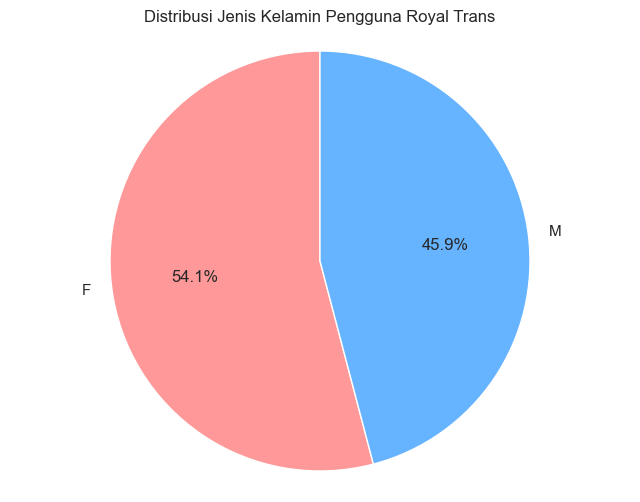

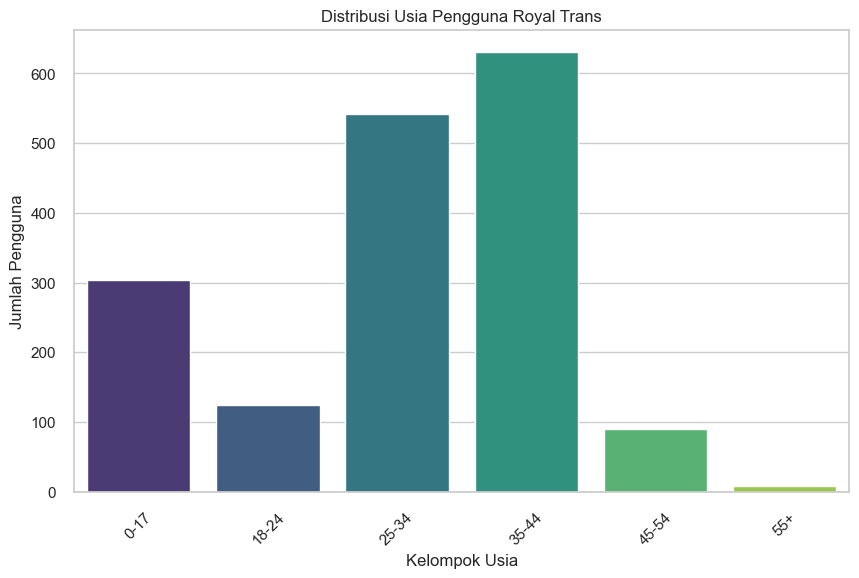

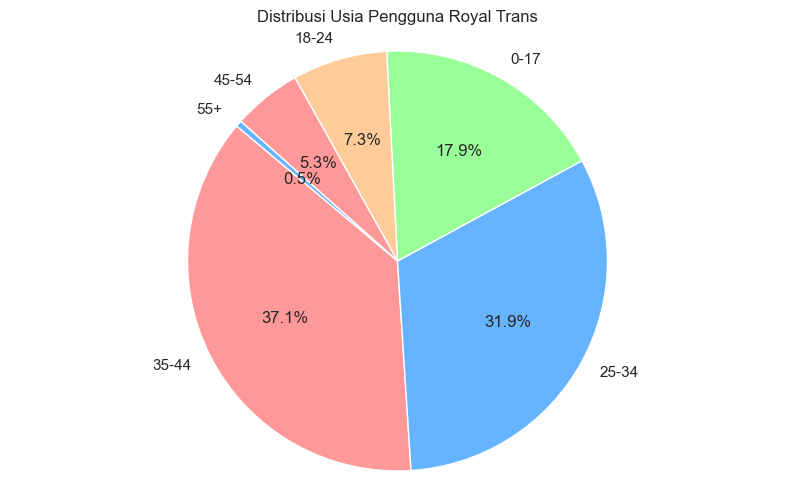

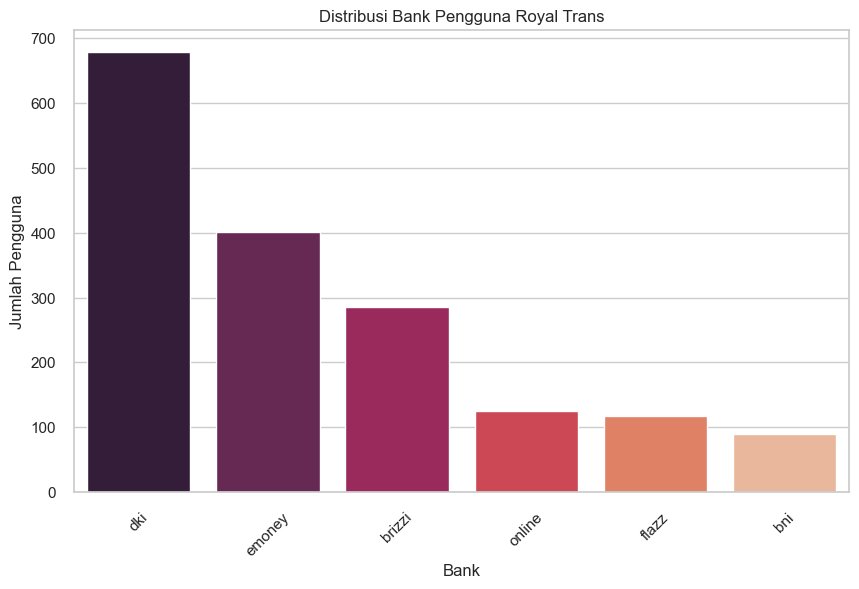

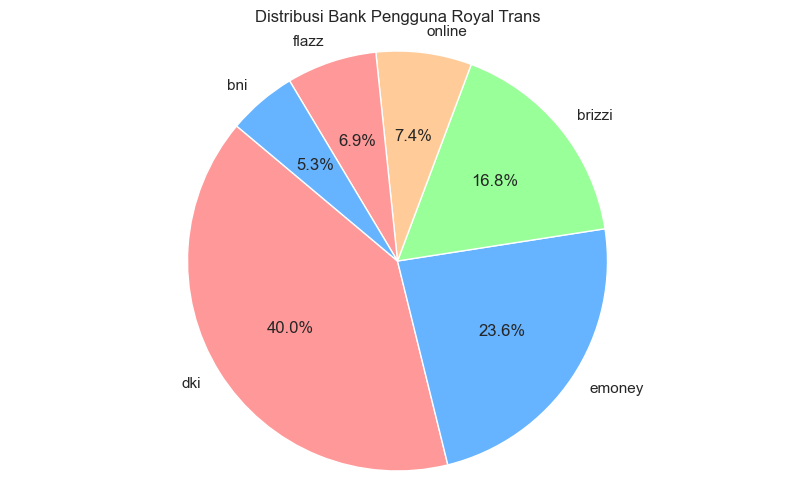

In [687]:
# Set gaya visualisasi
sns.set(style="whitegrid")

# 1. Pie Chart untuk Analisis Jenis Kelamin
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Jenis Kelamin Pengguna Royal Trans')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

# 2. Bar Chart untuk Analisis Usia
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.title('Distribusi Usia Pengguna Royal Trans')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140,colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Contoh warna
)
plt.title('Distribusi Usia Pengguna Royal Trans')
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.show()

# 3. Bar Chart untuk Analisis Bank
plt.figure(figsize=(10, 6))
sns.barplot(x=bank_counts.index, y=bank_counts.values, palette="rocket")
plt.title('Distribusi Bank Pengguna Royal Trans')
plt.xlabel('Bank')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.pie(bank_counts, labels=bank_counts.index, autopct='%1.1f%%', startangle=140,colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Contoh warna
)
plt.title('Distribusi Bank Pengguna Royal Trans')
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.show()


Demografi pengguna __Royaltrans__
1. Penumpang dengan jenis kelamin perempuan lebih banyak (54.1%) daripada penumpang dengan jenis kelamin laki-laki (45.9%)
2. Penumpang dengan rentang usia 35-44 tahun paling mendominasi (631 penumpang) dan rentang usia 25-34 sebanyak 542 orang. selanjutnya rentang usia 0-17 tahun sebanyak 304 orang (penumpang usia sekolah) dan 18-24 tahun (diasumsikan penumpang yang merupakan mahasiswa / kuliah). terakhir, usia 45 ke atas sampai dengan lansia sebanyak 98 orang.
3. Bank (prepaid card / kartu prabayar) yang paling banyak digunakan adalah Bank DKI, kemudian Bank Mandiri (emoney), dan bank-bank lainnya juga online payment.


#### __3.1.2 Penggunaan Royaltrans pada weekday (working day) dan weekend (non working day)__

In [688]:
df_royaltrans['tapInTime'] = pd.to_datetime(df_royaltrans['tapInTime'])

# Menambahkan kolom untuk hari dalam seminggu
df_royaltrans['day_of_week'] = df_royaltrans['tapInTime'].dt.day_name()

total_pengguna = df_royaltrans['tapInTime'].dt.month.eq(4).sum()

# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung total penggunaan
usage_summary = df_royaltrans['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Memisahkan weekday dan weekend
weekday_usage = usage_summary.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].sum()
weekend_usage = usage_summary.loc[['Saturday', 'Sunday']].sum()

weekday_days = 5  # Dari Senin sampai Jumat
weekend_days = 2  # Sabtu dan Minggu

# Menghitung rata-rata pengguna per hari
avg_weekday_usage = weekday_usage / weekday_days
avg_weekend_usage = weekend_usage / weekend_days

# Menampilkan hasil
print("Total penggunaan Royaltrans pada weekdays:", weekday_usage)
print("Total penggunaan Royaltrans pada weekends:", weekend_usage)
print("Total pengguna Royaltrans selama April 2023:", total_pengguna)

print("Rata-rata pengguna Royaltrans per hari pada weekdays:", avg_weekday_usage)
print("Rata-rata pengguna Royaltrans per hari pada weekends:", avg_weekend_usage)

Total penggunaan Royaltrans pada weekdays: 1558
Total penggunaan Royaltrans pada weekends: 141
Total pengguna Royaltrans selama April 2023: 1699
Rata-rata pengguna Royaltrans per hari pada weekdays: 311.6
Rata-rata pengguna Royaltrans per hari pada weekends: 70.5


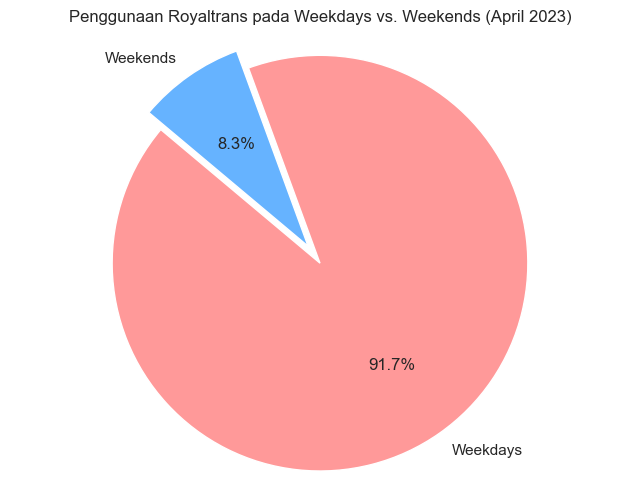

In [689]:
labels = ['Weekdays', 'Weekends']
sizes = [weekday_usage, weekend_usage]
colors = ['#ff9999', '#66b3ff']  # Warna dasar

# Membuat variasi warna yang lebih menarik
explode = (0.1, 0)  # Memisahkan bagian pie untuk menarik perhatian pada weekdays

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.title('Penggunaan Royaltrans pada Weekdays vs. Weekends (April 2023)')
plt.show()

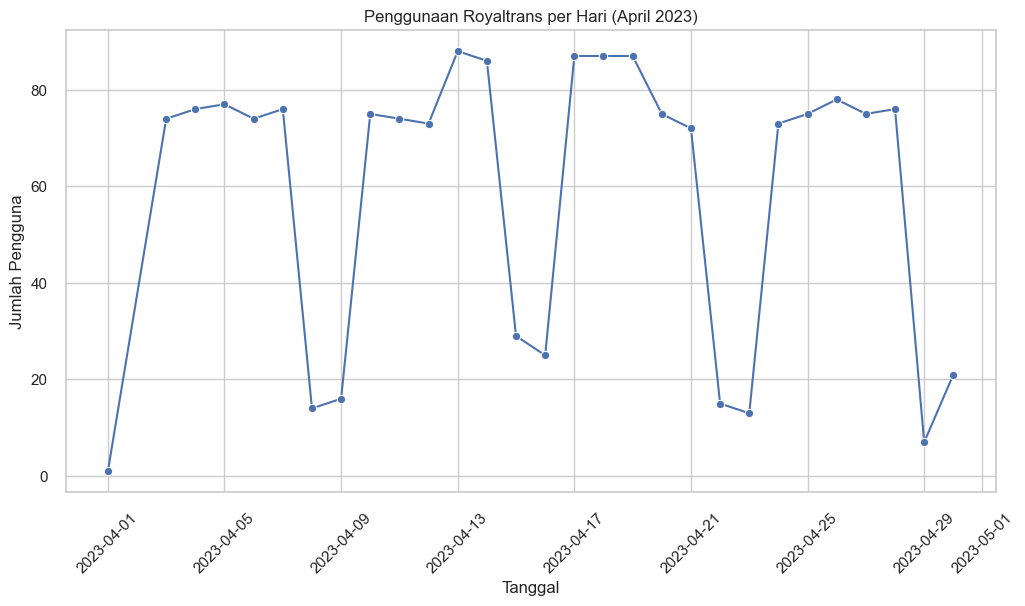

In [690]:
daily_usage = df_royaltrans['tapInTime'].dt.date.value_counts().sort_index()

# Membuat DataFrame dari daily_usage
df_daily_usage = daily_usage.reset_index()
df_daily_usage.columns = ['date', 'usage_count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily_usage, x='date', y='usage_count', marker='o')
plt.title('Penggunaan Royaltrans per Hari (April 2023)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

__Penggunaan Royaltrans per hari, hari kerja dan hari libur__

1. Berdasarkan data di bulan April 2023, 91.7% (sebanyak 1.558 pengguna) Royaltrans di hari kerja (Senin s.d Jumat) dan hanya 8.3% (sebanyak 141 pengguna) yang menggunakan Royaltrans di hari libur (Sabtu dan Minggu) dari total sebanyak 1.699 pengguna Royaltrans pada bulan April 2023. Hal ini mengindikasikan bahwa mobilitas warga yang berdomisili di sekitar Jakarta (Cibubur, Bekasi, Cinere/Depok, Bintaro/BSD/Serpong/Tangerang ) bekerja di Jakarta.
2. Perlu diperhatikan kondisi pada Bulan April 2023, terdapat beberapa hari libur di hari selain sabtu dan minggu, yaitu tanggal 7 (Jumat) sebagai Jumat Agung, libur dan cuti bersama Hari Raya Idul Fitri pada 21 (Jumat), 24 (Senin), 25 (Selasa), dan 26 (Rabu). Namun dari visualisasi Lineplot di atas, untuk tanggal-tanggal libur tersebut tidak berpengaruh / menurun. hal ini mengindikasikan bahwa pengguna tetap menggunakan Royaltrans untuk ke tempat ibadah dan berkunjung ke keluarga yang berada di Jakarta atau sekitar Jakarta.
3. Rata-rata pengguna Royaltrans harian di hari kerja sebanyak 311 pengguna, dan pengguna Royaltrans di hari libur sebanyak 70 pengguna. Perbandingan rata-rata pengguna di hari kerja dan hari libur rasionya adalah 22.5%.

#### __3.1.3 Penggunaan Royaltrans per jam (jam-jam sibuk / sepi)__

    hour  usage_count
0      5           88
1      6          225
2      7          155
3      8          172
4      9          167
5     10           11
6     11            8
7     12           17
8     13           11
9     14            9
10    15           14
11    16           83
12    17          234
13    18          118
14    19          143
15    20          133
16    21          111


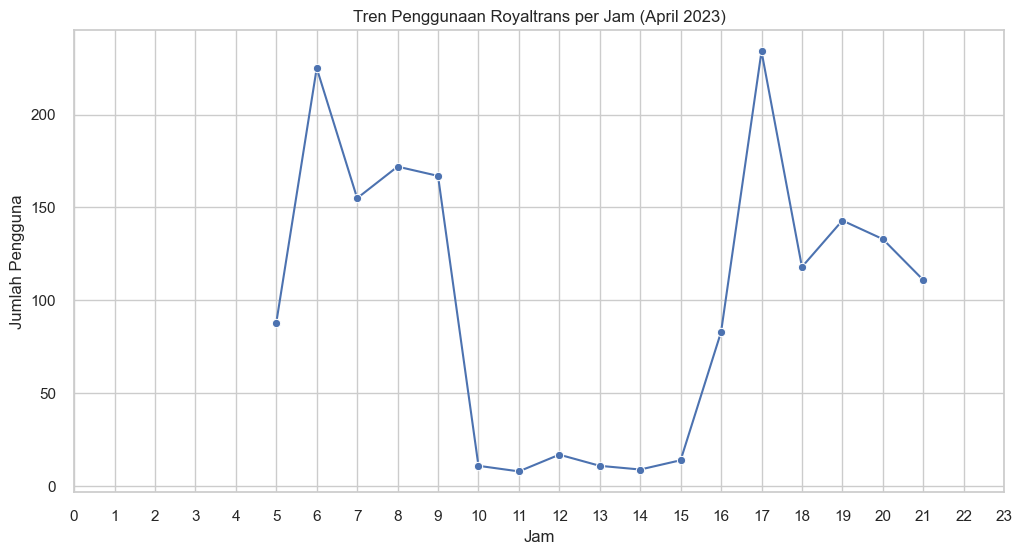

In [691]:
df_royaltrans['hour'] = df_royaltrans['tapInTime'].dt.hour

# Menghitung jumlah pengguna per jam
hourly_usage = df_royaltrans['hour'].value_counts().sort_index()

# Membuat DataFrame dari hourly_usage
df_hourly_usage = hourly_usage.reset_index()
df_hourly_usage.columns = ['hour', 'usage_count']

# Cek DataFrame untuk memastikan data tersedia
print(df_hourly_usage)

# Membuat line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hourly_usage, x='hour', y='usage_count', marker='o')
plt.title('Tren Penggunaan Royaltrans per Jam (April 2023)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks(range(24))  # Menampilkan semua jam
plt.grid(True)
plt.show()

In [692]:
# Menghitung total pengguna dari jam 10.00 hingga 15.00
total_pengguna = df_hourly_usage[(df_hourly_usage['hour'] >= 10) & (df_hourly_usage['hour'] <= 15)]['usage_count'].sum()

print(f'Total pengguna antara pukul 10.00 sampai 15.00 adalah {total_pengguna} pengguna')

Total pengguna antara pukul 10.00 sampai 15.00 adalah 70 pengguna


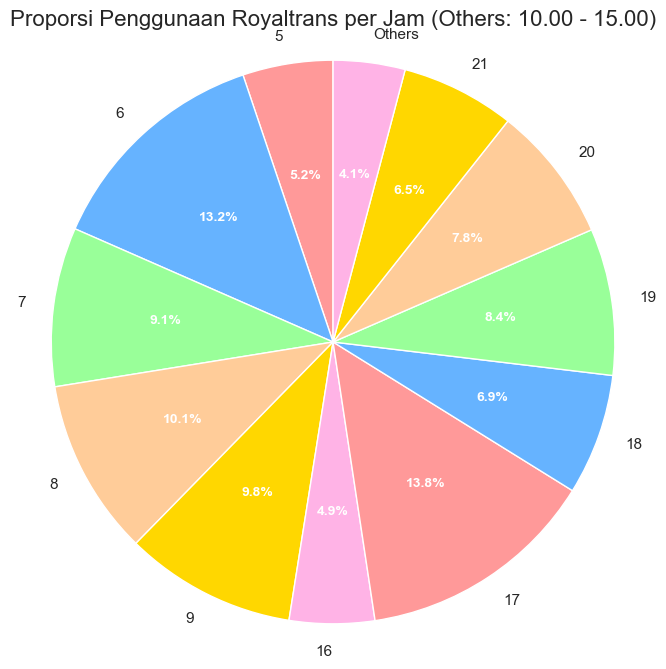

In [693]:
# Mengelompokkan jam 10-15 sebagai 'Others'
df_hourly_usage.loc[(df_hourly_usage['hour'].astype(int) >= 10) & (df_hourly_usage['hour'].astype(int) <= 15), 'hour'] = 'Others'

# Menghitung jumlah pengguna per jam (termasuk "Others")
usage_by_hour = df_hourly_usage.groupby('hour')['usage_count'].sum().reset_index()

# Membuat pie chart
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffd700', '#ffb3e6']  # Contoh warna menarik

wedges, texts, autotexts = plt.pie(usage_by_hour['usage_count'], 
                                    labels=usage_by_hour['hour'],
                                    autopct='%1.1f%%', 
                                    startangle=90,
                                    colors=colors)

plt.setp(autotexts, size=10, weight="bold", color="white")  # Mengatur gaya teks persen
plt.title('Proporsi Penggunaan Royaltrans per Jam (Others: 10.00 - 15.00)', fontsize=16)
plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
plt.show()


In [813]:
df_hourly_usage

,hour,usage_count
0,5,88
1,6,225
2,7,155
3,8,172
4,9,167
5,Others,11
6,Others,8
7,Others,17
8,Others,11
9,Others,9


In [812]:
usage_by_hour

,hour,usage_count
0,5,88
1,6,225
2,7,155
3,8,172
4,9,167
5,16,83
6,17,234
7,18,118
8,19,143
9,20,133


In [694]:
# Ekstrak tanggal, jam, dan hari
df_royaltrans['date'] = df_royaltrans['tapInTime'].dt.date
df_royaltrans['hour'] = df_royaltrans['tapInTime'].dt.hour
df_royaltrans['day_of_week'] = df_royaltrans['tapInTime'].dt.day_name()

# Filter untuk hari Sabtu dan Minggu
weekend_usage = df_royaltrans[df_royaltrans['day_of_week'].isin(['Saturday', 'Sunday'])]

# Menghitung jumlah pengguna per jam untuk hari Sabtu dan Minggu
hourly_weekend_usage = weekend_usage.groupby(['date', 'hour']).size().reset_index(name='usage_count')

# Cek DataFrame untuk memastikan data tersedia
hourly_weekend_usage


,date,hour,usage_count
0,2023-04-01,19,1
1,2023-04-08,6,1
2,2023-04-08,7,1
3,2023-04-08,8,2
4,2023-04-08,12,3
...,...,...,...
79,2023-04-30,15,3
80,2023-04-30,16,1
81,2023-04-30,18,1
82,2023-04-30,19,1


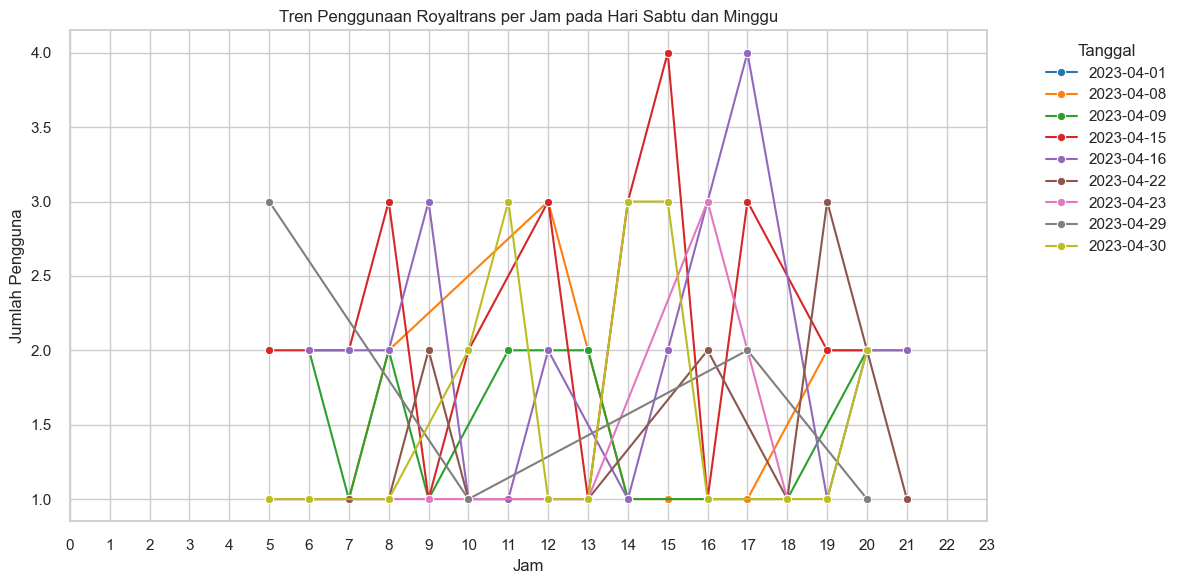

In [695]:
# Membuat line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_weekend_usage, x='hour', y='usage_count', hue='date', marker='o', palette='tab10')
plt.title('Tren Penggunaan Royaltrans per Jam pada Hari Sabtu dan Minggu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks(range(24))  # Menampilkan semua jam
plt.grid(True)
plt.legend(title='Tanggal', bbox_to_anchor=(1.05, 1), loc='upper left')  # Menambahkan legenda
plt.tight_layout()
plt.show()

In [696]:
# Ekstrak tanggal dan hari
df_royaltrans['date'] = df_royaltrans['tapInTime'].dt.date
df_royaltrans['day_of_week'] = df_royaltrans['tapInTime'].dt.day_name()

# Filter untuk bulan April 2023
df_april = df_royaltrans[(df_royaltrans['tapInTime'].dt.year == 2023) & 
                          (df_royaltrans['tapInTime'].dt.month == 4)]

# Hitung total pengguna di bulan April
total_pengguna_april = df_april.shape[0]

# Filter untuk hari Sabtu dan Minggu
april_weekend_usage = df_april[df_april['day_of_week'].isin(['Saturday', 'Sunday'])]

# Hitung total pengguna pada hari libur
total_pengguna_hari_libur = april_weekend_usage.shape[0]

# Hitung persentase
persentase_hari_libur = (total_pengguna_hari_libur / total_pengguna_april) * 100

print(f'Total pengguna pada hari libur (Sabtu dan Minggu) selama April 2023: {total_pengguna_hari_libur}')
print(f'Persentase pengguna pada hari libur dibandingkan total pengguna April 2023: {persentase_hari_libur:.2f}%')

Total pengguna pada hari libur (Sabtu dan Minggu) selama April 2023: 141
Persentase pengguna pada hari libur dibandingkan total pengguna April 2023: 8.30%


__Penggunaan Royaltrans di tiap jam selama April 2023__
1. Penggunaan tertinggi ada di pukul 06.00 WIB (225 pengguna) dan 17.00 WIB (234 pengguna).
2. Penggunaan terendah ada di rentang pukul 10.00 WIB - 15.00 WIB dengan total gabungan selama 5 jam hanya 70 pengguna (hanya 4.1% dari keseluruhan). Jadwal mulai operasional jam 5.00 WIB sampai dengan jadwal operasional terakhir yaitu jam 21.00.
3. Pada hari libur penggunaan mayoritas pada jam 15 dan jam 17, namun tidak banyak, mengingat total pengguna pada hari libur (Sabtu dan Minggu) di bulan April 2023 totalnya adalah 141 atau hanya 8.3% dari total pengguna selama April 2023.

## __3.2 Analisis Rute__

In [697]:
unique_corridors = df_royaltrans[['corridorID', 'corridorName']].drop_duplicates()
unique_corridors

,corridorID,corridorName
5,1T,Cibubur - Balai Kota
8,B14,Bekasi Barat - Kuningan
60,T21,Palem Semi - Bundaran Senayan
212,D32,Cinere - Bundaran Senayan
279,S31,Bintaro - Fatmawati
12072,B13,Bekasi Barat - Blok M
12111,D31,Cinere - Kuningan
12220,1K,Cibubur Junction - Blok M
12245,6P,Cibubur - Kuningan
12322,S12,BSD Serpong - Fatmawati


terdapat 10 rute untuk moda Royaltrans

__Peta Rute Royaltrans__

Dataframe untuk peta rute Royaltrans

In [698]:
# Ambil satu baris untuk setiap stopStartSeq dan stopEndSeq tanpa pengulangan
def select_stops(group):
    # Ambil baris dengan stopStartSeq terkecil
    selected_start = group[['stopStartSeq', 'corridorID', 'corridorName', 'direction', 
                            'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']].copy()
    
    # Ambil baris dengan stopEndSeq terbesar
    selected_end = group[['stopEndSeq', 'corridorID', 'corridorName', 'direction', 
                          'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon']].copy()
    
    selected_end = selected_end.sort_values(by='stopEndSeq', ascending=False).drop_duplicates(subset='stopEndSeq', keep='first')

    # Gabungkan stopStartSeq dan stopEndSeq
    combined = pd.concat([selected_start.rename(columns={'stopStartSeq': 'SeqStops', 
                                                          'tapInStopsName': 'stopsName',
                                                          'tapInStopsLat': 'stopsLat',
                                                          'tapInStopsLon': 'stopsLon'}),
                          selected_end.rename(columns={'stopEndSeq': 'SeqStops', 
                                                        'tapOutStopsName': 'stopsName',
                                                        'tapOutStopsLat': 'stopsLat',
                                                        'tapOutStopsLon': 'stopsLon'})],
                         ignore_index=True)
    
    # Hapus duplikat berdasarkan SeqStops
    combined = combined.drop_duplicates(subset='SeqStops')

    # Mengurutkan berdasarkan SeqStops
    combined = combined.sort_values(by='SeqStops').reset_index(drop=True)
    
    return combined

# Group berdasarkan corridorID dan direction, kemudian pilih stop
route_map_df = (df_royaltrans.groupby(['corridorID', 'direction'])
                 .apply(select_stops)
                 .reset_index(drop=True))

# Mengatur kolom yang sesuai untuk routeMap
routeMap = pd.DataFrame({
    'corridorID': route_map_df['corridorID'],
    'corridorName': route_map_df['corridorName'],
    'direction': route_map_df['direction'],
    'stopsName': route_map_df['stopsName'],
    'stopsLat': route_map_df['stopsLat'],
    'stopsLon': route_map_df['stopsLon'],
    'SeqStops': route_map_df['SeqStops'],
})

# Hasil akhir
routeMap = routeMap.reset_index(drop=True)
routeMap

,corridorID,corridorName,direction,stopsName,stopsLat,stopsLon,SeqStops
0,1K,Cibubur Junction - Blok M,0.0,Cibubur Junction,-6.368735,106.89366,0.0
1,1K,Cibubur Junction - Blok M,0.0,Komdak 1,-6.222333,106.81407,2.0
2,1K,Cibubur Junction - Blok M,0.0,Menara Mandiri,-6.223667,106.80710,4.0
3,1K,Cibubur Junction - Blok M,0.0,Gelora Bung Karno 1,-6.224642,106.80560,5.0
4,1K,Cibubur Junction - Blok M,0.0,Summitmas,-6.225826,106.80402,6.0
...,...,...,...,...,...,...,...
183,T21,Palem Semi - Bundaran Senayan,1.0,Islamic,-6.228521,106.61473,10.0
184,T21,Palem Semi - Bundaran Senayan,1.0,Plaza Europa,-6.221188,106.61667,11.0
185,T21,Palem Semi - Bundaran Senayan,1.0,Palem Semi 2,-6.220361,106.61649,12.0
186,T21,Palem Semi - Bundaran Senayan,1.0,Jln. Palem Jepang Baru,-6.218391,106.61589,13.0


__Rute Per `CorridorID` / `corridorName`__

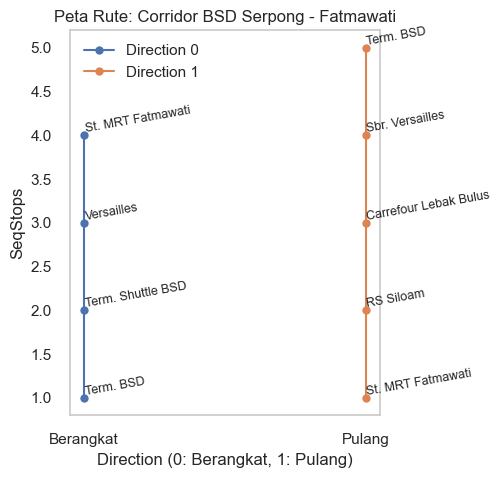

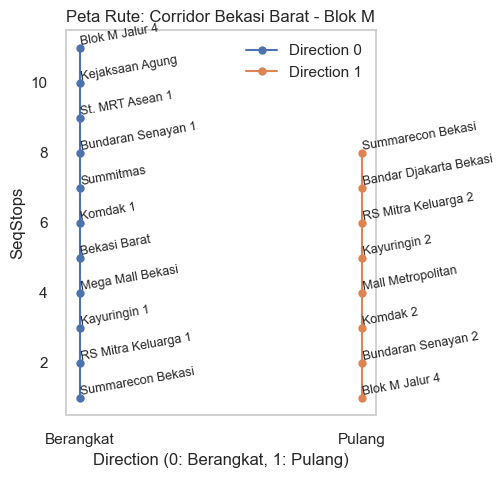

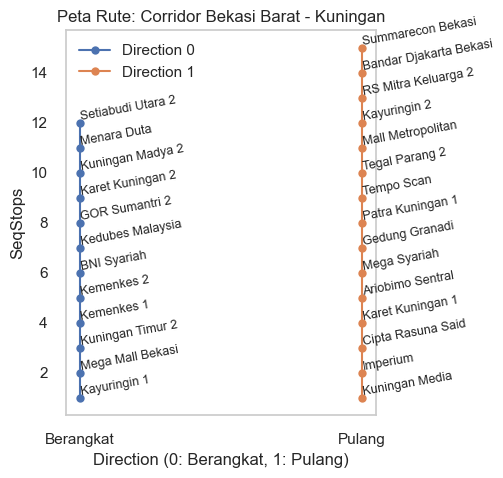

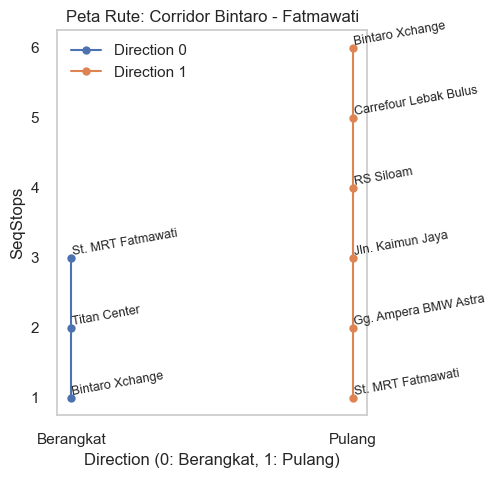

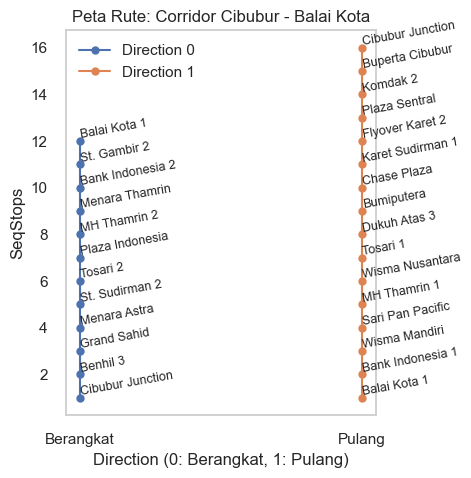

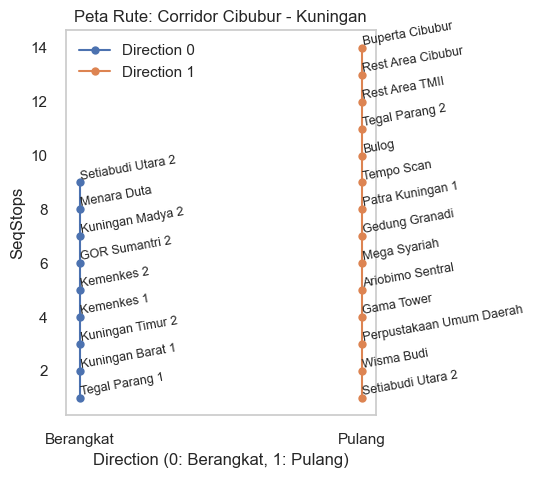

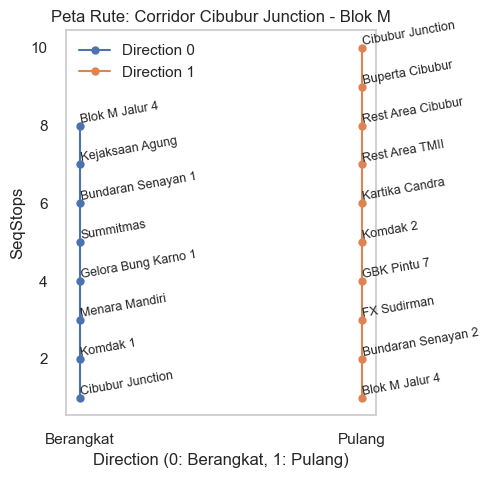

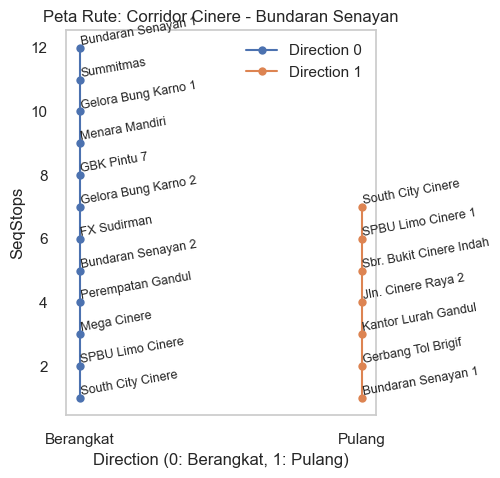

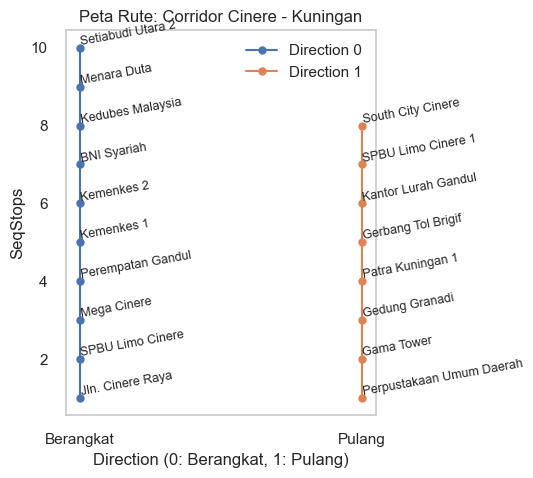

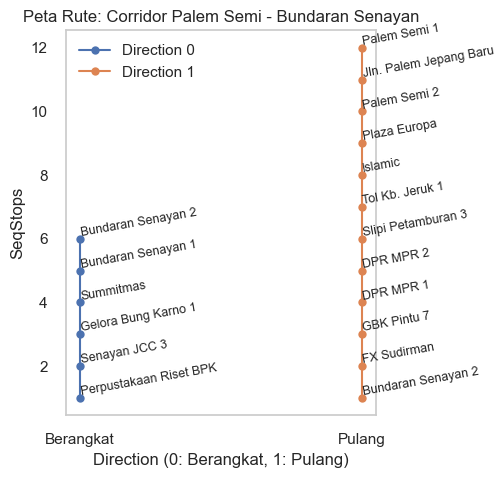

In [699]:
# Mengelompokkan dan mengurutkan
grouped = routeMap.groupby('corridorName')

for corridorName, group in grouped:
    plt.figure(figsize=(4, 5))

    for direction in [0, 1]:
        direction_group = group[group['direction'] == direction].sort_values('SeqStops')
        stops = direction_group['stopsName'].tolist()
        
        # Menentukan jarak yang sama untuk setiap titik
        num_stops = len(stops)
        adjusted_positions = [direction] * num_stops  # Posisi horizontal tetap pada 0 atau 1

        # Mengatur jarak vertikal yang sama
        seq_stops = list(range(1, num_stops + 1))  # Menggunakan rentang yang sama untuk semua titik

        # Plotting garis vertikal dan menghubungkan titik-titik
        plt.plot(adjusted_positions, seq_stops, marker='o', linestyle='-', label=f'Direction {direction}')

        # Tambahkan nama stops dengan posisi yang disesuaikan
        for i, stop in enumerate(stops):
            plt.text(adjusted_positions[i], seq_stops[i], stop, ha='left', va='bottom', fontsize=9, rotation=10)

    # Pengaturan plot
    plt.title(f'Peta Rute: Corridor {corridorName}')
    plt.xlabel('Direction (0: Berangkat, 1: Pulang)')
    plt.ylabel('SeqStops')
    plt.xticks([0, 1], ['Berangkat', 'Pulang'])
    plt.grid()
    plt.legend()
    
    # Tampilkan plot
    plt.show()

In [700]:
import folium
import matplotlib.colors as mcolors

# Buat peta dasar di lokasi Jakarta
m = folium.Map(location=[-6.1751, 106.8650], zoom_start=12)

# Dapatkan daftar unik corridorID
corridor_ids = routeMap['corridorID'].unique()

# Buat color map dengan warna yang berbeda untuk setiap corridorID
colors = sns.color_palette("husl", len(corridor_ids))
color_map = dict(zip(corridor_ids, colors))

# Loop untuk setiap corridorID dan direction
for (corridor_id, direction), group in routeMap.groupby(['corridorID', 'direction']):
    # Urutkan group berdasarkan SeqStops
    group = group.sort_values(by='SeqStops')
    
    # Ambil koordinat dari stop
    coordinates = list(zip(group['stopsLat'], group['stopsLon']))
    
    # Ambil stop awal dan stop akhir
    start_stop = group.iloc[0]  # SeqStops terendah
    end_stop = group.iloc[-1]   # SeqStops tertinggi
    
    # Tambahkan marker untuk stop awal
    folium.Marker(
        location=[start_stop['stopsLat'], start_stop['stopsLon']],
        popup=f"Awal: {start_stop['stopsName']} (ID: {corridor_id}, Direction: {direction})",
        icon=folium.Icon(color='green', icon='flag')
    ).add_to(m)

    # Tambahkan marker untuk stop akhir
    folium.Marker(
        location=[end_stop['stopsLat'], end_stop['stopsLon']],
        popup=f"Akhir: {end_stop['stopsName']} (ID: {corridor_id}, Direction: {direction})",
        icon=folium.Icon(color='red', icon='flag')
    ).add_to(m)

    # Gambar garis PolyLine yang menghubungkan semua stop
    folium.PolyLine(
        locations=coordinates,
        color=mcolors.to_hex(color_map[corridor_id]),  # Warna berdasarkan corridorID
        weight=5,
        opacity=0.7,
        tooltip=f"{corridor_id} - Direction: {direction}"
    ).add_to(m)

# Simpan peta ke file HTML
m.save('route_map_with_stops.html')

m

In [701]:
# Mengelompokkan data berdasarkan corridor ID dan menghitung total penggunaan
route_usage = df_royaltrans.groupby('corridorID').size().reset_index(name='usage_count')

# Mengurutkan rute berdasarkan penggunaan terendah
least_used_routes = route_usage.sort_values(by='usage_count').head(3)

# Menampilkan hasil
for index, row in least_used_routes.iterrows():
    print(f"Rute yang kurang diminati: {row['corridorID']} dengan {row['usage_count']} penggunaan.")


Rute yang kurang diminati: D31 dengan 88 penggunaan.
Rute yang kurang diminati: 6P dengan 94 penggunaan.
Rute yang kurang diminati: S12 dengan 94 penggunaan.


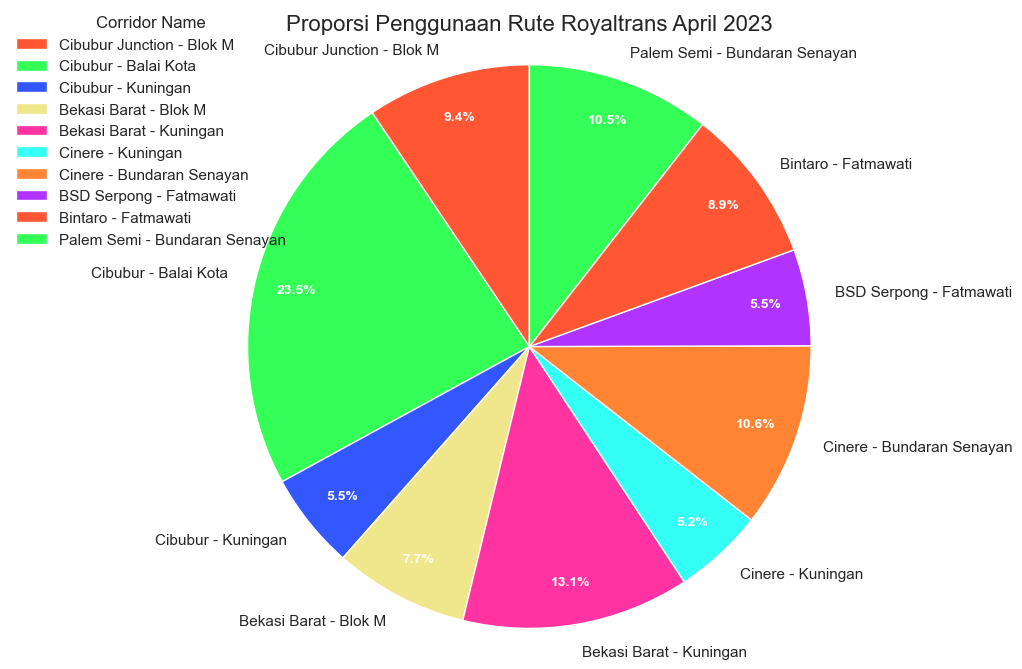

In [702]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan df_royaltrans sudah terdefinisi dan memiliki data yang diperlukan
df_royaltrans['tapInTime'] = pd.to_datetime(df_royaltrans['tapInTime'])

# Mengambil data untuk bulan April 2023
df_april = df_royaltrans[(df_royaltrans['tapInTime'].dt.year == 2023) & (df_royaltrans['tapInTime'].dt.month == 4)]

# Mengelompokkan data berdasarkan corridor ID dan menghitung total penggunaan
route_usage = df_april.groupby(['corridorID', 'corridorName']).size().reset_index(name='usage_count')
# Memastikan ada data sebelum membuat pie chart
if not route_usage.empty:
    # Mendapatkan palet warna yang lebih bold
    colors = ['#FF5733', '#33FF57', '#3357FF', '#F0E68C', '#FF33A1', '#33FFF5', '#FF8433', '#B033FF']

    # Membuat pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(route_usage['usage_count'], 
                                    labels=route_usage['corridorName'],
                                    autopct='%1.1f%%', 
                                    startangle=90, 
                                    colors=colors,
                                    pctdistance=0.85)  # Mengatur jarak teks persen

    plt.setp(autotexts, size=10, weight="bold", color="white")  # Mengatur gaya teks persen
    plt.title('Proporsi Penggunaan Rute Royaltrans April 2023', fontsize=16)
    plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran

    # Menambahkan legenda
    plt.legend(wedges, route_usage['corridorName'], title='Corridor Name', loc='center left', bbox_to_anchor=(-0.35, 0.35, 0.5, 1))

    plt.show()
else:
    print("Tidak ada data untuk April 2023.")


In [814]:
route_usage

,date,corridorID,usage_count
0,2023-04-01,S12,1
1,2023-04-03,1K,6
2,2023-04-03,1T,20
3,2023-04-03,6P,4
4,2023-04-03,B13,6
...,...,...,...
260,2023-04-30,D31,3
261,2023-04-30,D32,1
262,2023-04-30,S12,2
263,2023-04-30,S31,3


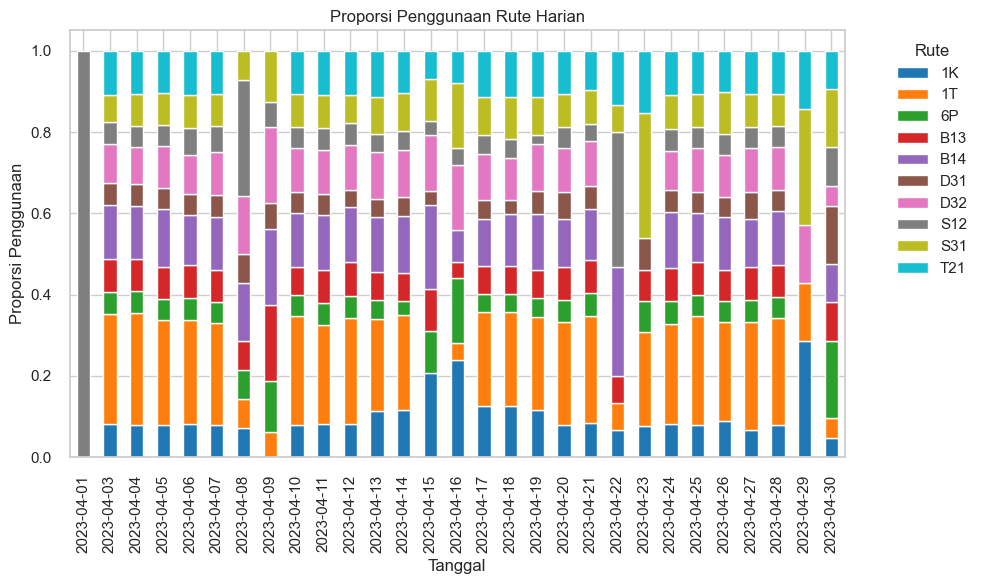

In [703]:
# Menghitung jumlah penggunaan per corridor untuk setiap tanggal
df_royaltrans['date'] = df_royaltrans['tapInTime'].dt.date  # Mengambil tanggal dari tapInTime
route_usage = df_royaltrans.groupby(['date', 'corridorID']).size().reset_index(name='usage_count')

# Menghitung proporsi penggunaan per corridor untuk setiap tanggal
daily_usage = route_usage.groupby(['date', 'corridorID']).agg({'usage_count': 'sum'}).reset_index()

# Menghitung proporsi
pivot_usage = daily_usage.pivot(index='date', columns='corridorID', values='usage_count').fillna(0)

# Menghitung proporsi
pivot_usage = pivot_usage.div(pivot_usage.sum(axis=1), axis=0)

# Mendapatkan palet warna kontras
colors = plt.cm.get_cmap('tab10', len(pivot_usage.columns))

# Membuat stacked bar plot dengan warna kontras
pivot_usage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[colors(i) for i in range(len(pivot_usage.columns))])

plt.title('Proporsi Penggunaan Rute Harian')
plt.xlabel('Tanggal')
plt.ylabel('Proporsi Penggunaan')
plt.legend(title='Rute', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

__Dari 3 Rute yang paling banyak diminati yaitu:__
- 1T : Cibubur - Balai Kota (400 pengguna)
- B14 : Bekasi Barat - Kuningan (222 pengguna)
- D32 : Cinere - Bundaran Senayan (180 pengguna)

__Dari 3 Rute yang kurang diminati yaitu:__
- D31 : Cinere - Kuningan (88 pengguna)
- 6P : Cibubur - Kuningan (94 pengguna)
- S12 : Terminal BSD - Fatmawati (94 pengguna)

1. Dari data per rute per harinya ada keunikan pada tanggal 1 (hari Minggu), 8 (hari Minggu) dan tanggal 22 (hari Minggu) yaitu rute S12 terminal BDS - Fatmawati, mengindikasikan ada warga yang berangkat dari terminal BSD menuju Fatmawati yang rutin naik Royaltrans pada hari Minggu. 
2. Dari rute yang paling diminati dan paling kurang diminati terdapat suatu pola yaitu Cibubur - Balai Kota yang paling diminati, sedangkan untuk Cibubur - Kuningan kurang diminati. Ini tidak dapat disimpulkan bahwa mobilitas terpadat adalah warga dari Cibubur.

Namun lebih jelasnya dapat dianalisis kembali sesuai jadwal, apakah ada jadwal yang anomali atau kurang tepat sehingga tidak maksimal dan efektif dalam operasional Royaltrans.


## __3.3 Analisis Jadwal__
__Mengidentifikasi jadwal Keberangkatan dan Kepulangan (`direction` 0 / berangkat atau 1 / pulang) pada tiap `corridorID` atau `corridorName` dari data df_royaltrans__.

1. Mengambil kolom yang dibutuhkan yaitu `corridorID`, `corridorName`, `direction`, `tapInStopsName`, `stopStartSeq` `tapInTime`. 
2. Kolom `tapInTime` diubah menjadi only_hour atau jam saja hh:mm.
3. Memilih / filter kolom `stopStartSeq` yang bernilai paling kecil (0 atau 1 atau 2) dengan asumsi bus tersebut memulai rutenya pada pemberhentian maks 3 (yaitu seq 0, 1, atau 2).
4. Mengurutkan berdasarkan `corridorID`, `direction`, dan `tapInTime` paling awal.
5. Limitasi hh:mm (pembulatan jam) dan untuk setiap `corridorID` dan `direction` pada jam yang sudah dibulatkan dan bernilai sama, maka dilakukan penghapusan sehingga tidak duplikasi.

In [704]:
# Pilih kolom yang dibutuhkan
selected_columns = df_royaltrans[['corridorID', 'corridorName', 'direction', 'tapInStopsName', 'stopStartSeq', 'tapInTime']]

# Filter berdasarkan stopStartSeq yang bernilai 0, 1, atau 2
filtered_df = selected_columns[selected_columns['stopStartSeq'].isin([0, 1, 2])]

# Ubah kolom tapInTime menjadi format jam (hh:mm)
filtered_df['only_hour'] = filtered_df['tapInTime'].dt.strftime('%H:%M')

# Fungsi untuk membulatkan waktu
def round_time(dt):
    if pd.isna(dt):
        return dt
    
    minutes = dt.minute
    if minutes < 10:
        rounded_time = dt.replace(minute=0, second=0)
    elif 10 <= minutes < 40:
        rounded_time = dt.replace(minute=30, second=0)
    else:  # minutes >= 40
        rounded_time = dt.replace(hour=dt.hour + 1, minute=0, second=0)
    
    return rounded_time.strftime('%H:%M')

# Tambahkan kolom roundhourly dengan hasil pembulatan
filtered_df['roundhourly'] = filtered_df['tapInTime'].apply(round_time)

# Urutkan berdasarkan corridorID, direction, dan tapInTime
sorted_df = filtered_df.sort_values(by=['corridorID', 'direction', 'tapInTime'])

In [705]:
# Hapus duplikasi berdasarkan corridorID, direction, dan roundhourly
unique_schedules = filtered_df.drop_duplicates(subset=['corridorID', 'direction', 'roundhourly'])

# Hapus kolom tapInTime, tapInStopsName, StopStartSeq
unique_schedules = unique_schedules.drop(columns=['tapInTime', 'tapInStopsName','stopStartSeq', 'only_hour'])

# Urutkan berdasarkan corridorID, direction, dan roundhourly
sorted_df = unique_schedules.sort_values(by=['corridorID', 'direction', 'roundhourly'])
sorted_df

,corridorID,corridorName,direction,roundhourly
33607,1K,Cibubur Junction - Blok M,0.0,08:30
32862,1K,Cibubur Junction - Blok M,0.0,16:00
33746,1K,Cibubur Junction - Blok M,1.0,06:00
17220,1K,Cibubur Junction - Blok M,1.0,06:30
15220,1K,Cibubur Junction - Blok M,1.0,07:00
...,...,...,...,...
17843,T21,Palem Semi - Bundaran Senayan,1.0,19:30
23843,T21,Palem Semi - Bundaran Senayan,1.0,20:00
14843,T21,Palem Semi - Bundaran Senayan,1.0,20:30
21843,T21,Palem Semi - Bundaran Senayan,1.0,21:00


In [748]:
count_df = sorted_df.groupby(['corridorID', 'corridorName', 'direction']).size().reset_index(name='Jumlah Jadwal')
count_df

,corridorID,corridorName,direction,Jumlah Jadwal
0,1K,Cibubur Junction - Blok M,0.0,2
1,1K,Cibubur Junction - Blok M,1.0,10
2,1T,Cibubur - Balai Kota,0.0,10
3,1T,Cibubur - Balai Kota,1.0,22
4,6P,Cibubur - Kuningan,0.0,2
5,6P,Cibubur - Kuningan,1.0,1
6,B13,Bekasi Barat - Blok M,0.0,10
7,B13,Bekasi Barat - Blok M,1.0,8
8,B14,Bekasi Barat - Kuningan,0.0,1
9,B14,Bekasi Barat - Kuningan,1.0,9


Membuat jadwal per corridor dengan dictionary hasil dari dataframe `sorted_df`

Diasumsikan:
1. Untuk setiap rute Bus Royaltrans memiliki pool / tempat parkir di titik pertama rute pergi (`direction` = 0)
2. Untuk setiap satu armada bus yang berangkat (`direction`= 0) dapat langsung memiliki jadwal pulang/kembali (`direction` = 1) dengan kurun maksimal 2 jam setelah jadwal berangkat.

| No | corridorID | corridorName                      | poolBus             |
|----|------------|-----------------------------------|---------------------|
| 1  | 1K         | Cibubur Junction - Blok M        | Cibubur    |
| 2  | 1T         | Cibubur - Balai Kota             | Cibubur             |
| 3  | B13        | Bekasi Barat - Blok M            | Bekasi Barat        |
| 4  | B14        | Bekasi Barat - Kuningan          | Bekasi Barat        |
| 5  | D31        | Cinere - Kuningan                | Cinere              |
| 6  | D32        | Cinere - Bundaran Senayan        | Cinere              |
| 7  | S12        | BSD Serpong - Fatmawati          | BSD Serpong         |
| 8  | S31        | Bintaro - Fatmawati              | BSD Serpong             |
| 9  | T21        | Palem Semi - Bundaran Senayan     | Palem Semi          |
| 10 | 6P         | Cibubur - Kuningan               | Cibubur             |

Selain pool di atas, TransJakarta secara khusus mengakomodir pool yang berada di dalam kota Jakarta untuk armada yang memiliki rute di dalam kota, namun bisa dipakai bus-bus Royaltrans. Adapun poolnya sebagai berikut:
- Pool Cawang: Berada di Cawang, Jakarta Timur.
- Pool Pulogebang: Lokasi ini juga berada di Jakarta Timur.
- Pool Tanjung Priok: Terletak dekat pelabuhan, mendukung layanan transportasi ke daerah tersebut.
- Pool Grogol: Terletak di Grogol, Jakarta Barat.

In [708]:
# Menambahkan kolom untuk menghitung urutan per corridorID
sorted_df['new_index'] = sorted_df.groupby('corridorID').cumcount() + 1

# Menghapus kolom indeks lama jika perlu
sorted_df = sorted_df.reset_index(drop=True)

# Mengatur indeks baru sebagai kolom 'new_index'
sorted_df.set_index('new_index', inplace=True)

# Membuat dictionary untuk menyimpan DataFrame berdasarkan corridorID
dfs_by_corridor = {corridor_id: group for corridor_id, group in sorted_df.groupby('corridorID')}

# Jika Anda juga ingin berdasarkan corridorName, Anda bisa melakukannya juga
dfs_by_corridor_name = {corridor_name: group for corridor_name, group in sorted_df.groupby('corridorName')}

sorted_df = sorted_df.reset_index(drop=True)
sorted_df.index = sorted_df.index + 1  # Menambahkan 1 pada indeks

# Contoh: Akses DataFrame untuk corridorID tertentu
df_1K = dfs_by_corridor['1K']
df_1T = dfs_by_corridor['1T']
df_B13 = dfs_by_corridor['B13']
df_B14 = dfs_by_corridor['B14']
df_D31 = dfs_by_corridor['D31']
df_D32 = dfs_by_corridor['D32']
df_S12 = dfs_by_corridor['S12']
df_S31 = dfs_by_corridor['S31']
df_T21 = dfs_by_corridor['T21']
df_6P = dfs_by_corridor['6P']


In [709]:
df_1K

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,1K,Cibubur Junction - Blok M,0.0,08:30
2,1K,Cibubur Junction - Blok M,0.0,16:00
3,1K,Cibubur Junction - Blok M,1.0,06:00
4,1K,Cibubur Junction - Blok M,1.0,06:30
5,1K,Cibubur Junction - Blok M,1.0,07:00
6,1K,Cibubur Junction - Blok M,1.0,07:30
7,1K,Cibubur Junction - Blok M,1.0,08:30
8,1K,Cibubur Junction - Blok M,1.0,09:00
9,1K,Cibubur Junction - Blok M,1.0,09:30


__Rute 1K : Cibubur Junction - Blok M__ 
1. Jadwal mulai beroperasi dengan `direction` pergi / berangkat  terlalu siang (kurang pagi), bisa diatur jadwal lebih pagi lagi misalnya di jam 05.30 atau jam 06.30 dengan asumsi pola pengguna berangkat dari rumah dan tiba di kantor sebelum pukul 08.00 atau 09.00 WIB. 
2. Jadwal pertama pada `direction` pulang / kembali dari Blok M, cukup pagi yaitu pukul 06.00 untuk mengakomodir penumpang yang memiliki tujuan berkebalikan arah dengan pengguna pada umumnya (para pekerja di Jakarta yang berdomisili di luar atau pinggiran Jakarta). Armada yang sama seharusnya dapat mulai beroperasi di jam 05.00 berangkat (`direction` 0) dari parkir bus di Cibubur sehingga mengefektifkan armada agar tetap bisa mengangkut penumpang yang berangkat dan pulang.
3. Armada yang mengangkut penumpang pada jadwal pulang / kembali pukul 09.30 seharusnya dapat mengangkut penumpang yang berangkat dari Cibubur (sesuai pool bus) pada pukul 07.00 atau pukul 07.30 (dapat disesuaikan).
4. Jadwal berangkat pukul 16.00 sudah tepat, agar armada dapat mengangkut penumpang yang memiliki kebalikan arah dengan penumpang pada umumnya (Cibubur ke Blok M) dan setelahnya armada yang sama dapat mengangkut penumpang yang kembali ke Cibubur dari Blok M di pukul 17.00 atau pukul 17.30. 
5. Armada yang bersiap untuk jadwal pertama kepulangan di sore hari dapat dimulai pukul 15.30 berangkat dari pool terdekat (pool Cawang) ke pemberhentian Blok M agar tiba tepat waktu yaitu pukul 16.15 atau 16.30.

In [710]:
df_1T

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,1T,Cibubur - Balai Kota,0.0,16:30
2,1T,Cibubur - Balai Kota,0.0,17:00
3,1T,Cibubur - Balai Kota,0.0,17:30
4,1T,Cibubur - Balai Kota,0.0,18:00
5,1T,Cibubur - Balai Kota,0.0,18:30
6,1T,Cibubur - Balai Kota,0.0,19:00
7,1T,Cibubur - Balai Kota,0.0,19:30
8,1T,Cibubur - Balai Kota,0.0,20:00
9,1T,Cibubur - Balai Kota,0.0,20:30


__Rute 1T : Cibubur - Balai Kota__

1. Jadwal dengan `direction` pergi / berangkat tidak terdapat jadwal di pagi hari. Seluruh jadwal berangkat dari Cibubur menuju Balai Kota ada di sore hari yaitu mulai dari pukul 16.30. Perlu ada jadwal pagi hari agar pengguna sebagai warga Cibubur dapat terakomodir menuju tengah kota Jakarta. Setidaknya 2 atau 3 jadwal keberangkatan di pagi hari.
2. Jadwal dengan `direction` kembali / pulang cukup banyak, mulai di pagi hari sampai dengan malam, yaitu sebanyak 21 keberangkatan. Bisa dioptimalkan dan dibuat lebih efektif dengan melihat traffic / kebutuhan dari pengguna rute tersebut.
Sehingga armada yang ada dapat lebih efektif pada corridor ini. Jika permintaan dari pengguna hanya sedikit, dapat dibuat jadwal per 1 jam sekali saja, tidak perlu per 30 menit sekali.

In [711]:
df_B13

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,B13,Bekasi Barat - Blok M,0.0,06:30
2,B13,Bekasi Barat - Blok M,0.0,07:00
3,B13,Bekasi Barat - Blok M,0.0,07:30
4,B13,Bekasi Barat - Blok M,0.0,08:00
5,B13,Bekasi Barat - Blok M,0.0,08:30
6,B13,Bekasi Barat - Blok M,0.0,09:00
7,B13,Bekasi Barat - Blok M,0.0,09:30
8,B13,Bekasi Barat - Blok M,0.0,11:30
9,B13,Bekasi Barat - Blok M,0.0,12:00


__Rute B13 : Bekasi Barat - Blok M__

1. Jadwal paling pagi dengan `direction` pergi / berangkat cukup siang yaitu mulai pukul 06.30, dan tetap mengakomodir jadwal di siang hari yaitu 11.30 dan 12.00.
2. Tidak terdapat jadwal dengan arah berangkat di sore hari. Untuk kebutuhan menambah jadwal arah berangkat / pergi di sore hari perlu dipertimbangkan, namun tetap melihat dari permintaan pengguna / warga.
3. Terdapat 8 jadwal dengan arah / `direction` pulang yang dimulai pada pukul 14.30, cukup awal untuk asumsi pengguna yang pulang kerja dari kantornya di tengah kota.

In [712]:
df_B14

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,B14,Bekasi Barat - Kuningan,0.0,14:00
2,B14,Bekasi Barat - Kuningan,1.0,05:00
3,B14,Bekasi Barat - Kuningan,1.0,05:30
4,B14,Bekasi Barat - Kuningan,1.0,06:00
5,B14,Bekasi Barat - Kuningan,1.0,06:30
6,B14,Bekasi Barat - Kuningan,1.0,07:00
7,B14,Bekasi Barat - Kuningan,1.0,08:00
8,B14,Bekasi Barat - Kuningan,1.0,11:00
9,B14,Bekasi Barat - Kuningan,1.0,12:00


__Rute B14 : Bekasi Barat - Kuningan__

1. Jadwal dengan `direction` berangkat dari Bekasi Barat ke Kuningan hanya 1 dan dimulai pada siang hari menjelang sore, yaitu pukul 14.00 WIB. Perlu dipertimbangan dengan menambah jadwal keberangkatan di pagi hari dengan mempertimbangkan pola pengguna corridor ini.
2. Terdapat 9 jadwal dengan `direction` pulang atau kembali dari Kuningan ke Bekasi Barat, di mana seluruhnya pagi hingga siang hari yaitu mulai pukul 05.00 WIB hingga pukul 12.30 WIB, dengan rentang 30 menit hingga 1 jam.
3. Tidak terdapatnya jadwal kepulangan di sore hari perlu dipertimbangkan.

In [713]:
df_D31

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,D31,Cinere - Kuningan,0.0,10:30
2,D31,Cinere - Kuningan,0.0,20:30


__Rute D31 : Cinere - Kuningan__

1. Jadwal keberangkatan pada corridor ini hanya 2x dalam sehari dan keduanya adalah arah pergi atau berangkat. Satu di waktu siang pagi menjelang siang 10.30 dan cukup malam yaitu pukul 20.30.
2. Perlu dipertimbangkan untuk memperbanyak jadwal namun tergantung dari pola pengguna pada corridor ini.

In [714]:
df_D32

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,D32,Cinere - Bundaran Senayan,0.0,07:30
2,D32,Cinere - Bundaran Senayan,0.0,08:30
3,D32,Cinere - Bundaran Senayan,0.0,10:00
4,D32,Cinere - Bundaran Senayan,0.0,13:30
5,D32,Cinere - Bundaran Senayan,0.0,17:00
6,D32,Cinere - Bundaran Senayan,0.0,17:30
7,D32,Cinere - Bundaran Senayan,0.0,18:30
8,D32,Cinere - Bundaran Senayan,0.0,19:00
9,D32,Cinere - Bundaran Senayan,0.0,20:00


__Rute D32 : Cinere - Bundaran Senayan__

1. Terdapat 12 jadwal dengan arah berangkat dari Cinere ke Bundaran Senayan, dimulai cukup siang yaitu pukul 07.30 WIB dan jadwal terakhir pukul 21.30
2. Terdapat 13 jadwal dengan arah pulang / kembali dari Bundaran Senayan kembali ke Cinere. Jadwal kembali ini dimulai cukup pagi yaitu pukul 05.00 WIB, dan selanjutnya pukul 08.30, selebihnya jadwal di sore hari dimulai pukul 16.00 hingga 21.30 dengan jeda tiap jam adalah 30 menit. Jadwal ini cukup banyak dan ideal apabila kebutuhan atau permintaan pengguna cukup banyak.
4. Untuk menambah atau mengurangi jadwal keberangkatan dan kepulangan perlu ditinjau kembali tergantung traffic pengguna agar dapat mengefektifkan armada pada corridor ini.

In [715]:
df_S12

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,S12,BSD Serpong - Fatmawati,0.0,06:00
2,S12,BSD Serpong - Fatmawati,0.0,06:30
3,S12,BSD Serpong - Fatmawati,0.0,07:00
4,S12,BSD Serpong - Fatmawati,0.0,07:30
5,S12,BSD Serpong - Fatmawati,0.0,08:00
6,S12,BSD Serpong - Fatmawati,0.0,08:30
7,S12,BSD Serpong - Fatmawati,0.0,09:00
8,S12,BSD Serpong - Fatmawati,0.0,09:30
9,S12,BSD Serpong - Fatmawati,0.0,10:00


__Rute S12 : BSD Serpong - Fatmawati__

1. Terdapat 12 jadwal dengan arah keberangkatan dari BSD Serpong ke Fatmawati, dimulai pukul 06.00 WIB sampai dengan pukul 10.00 di pagi hari, kemudian dilanjutkan kembali jadwal di sore hari pukul 16.30, pukul 18.00 dan pukul 19.30.
2. Sebanyak 14 jadwal dengan arah pulang dari Fatmawati kembali ke BSD Serpong, di mulai pada pagi menjelang siang yaitu pukul 10.30 WIB, lalu pukul 11.00, 13.00, 14.00, kemudian sore hari pukul 17.00 sampai dengan pukul 22.00 dengan rentang tiap 30 menit antar jadwal.


In [716]:
df_S31

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,S31,Bintaro - Fatmawati,0.0,07:00
2,S31,Bintaro - Fatmawati,0.0,08:30
3,S31,Bintaro - Fatmawati,0.0,09:30
4,S31,Bintaro - Fatmawati,0.0,10:30
5,S31,Bintaro - Fatmawati,0.0,11:30
6,S31,Bintaro - Fatmawati,0.0,13:00
7,S31,Bintaro - Fatmawati,0.0,13:30
8,S31,Bintaro - Fatmawati,0.0,16:00
9,S31,Bintaro - Fatmawati,0.0,17:00


__Rute S31 : Bintaro - Fatmawati__

1. Jadwal pada corridor ini cukup banyak, untuk arah berangkat dari Bintaro ke Fatmawati ada 19 jadwal, dan jadwal ini bisa dikatakan sepanjang hari, karena di pagi hari, siang dan sore hari dengan rentang 30 menit sampai 1 jam dan 1 jam 30 menit sekali. Namun, jadwal paling pagi di pukul 07.00 (tidak cukup pagi untuk jadwal pertama) dan selanjutnya di pukul 08.30 (cukup jauh di rentang 1 jam 30 menit).
2. Arah kembali dari Fatmawati ke Bintaro terdapat 17 jadwal. Dimulai pukul 05.00 WIB di pagi hari hingga pukul 10.00 WIB dengan rentang 30 menit sekali. Jadwal di sore hari mulai pukul 16.00 sampai dengan pukul 20.30, dengan rentang yang variatif, 1 jam, 30 menit, 1 jam 30 menit.

In [717]:
df_T21

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,T21,Palem Semi - Bundaran Senayan,1.0,05:00
2,T21,Palem Semi - Bundaran Senayan,1.0,05:30
3,T21,Palem Semi - Bundaran Senayan,1.0,06:30
4,T21,Palem Semi - Bundaran Senayan,1.0,07:00
5,T21,Palem Semi - Bundaran Senayan,1.0,12:00
6,T21,Palem Semi - Bundaran Senayan,1.0,13:00
7,T21,Palem Semi - Bundaran Senayan,1.0,17:30
8,T21,Palem Semi - Bundaran Senayan,1.0,18:00
9,T21,Palem Semi - Bundaran Senayan,1.0,18:30


__Rute T21 : Palem Semi - Bundaran Senayan__

1. Jadwal pada corridor ini hanya `direction` pulang, sebanyak 15 jadwal, dengan jadwal sepanjang hari, mulai pukul 05.00 sampai dengan pukul 22.00.
2. Perlu melihat pola pengguna pada corridor ini untuk melakukan improvisasi apakah perlu menambah direction keberangkatan atau cukup jadwal yang sudah ada saat ini.

In [718]:
df_6P

,corridorID,corridorName,direction,roundhourly
new_index,,,,
1,6P,Cibubur - Kuningan,0.0,06:30
2,6P,Cibubur - Kuningan,0.0,15:00
3,6P,Cibubur - Kuningan,1.0,20:30


__Rute 6P : Cibubur - Kuningan__

1. Pada rute ini hanya terdapat 3 jadwal dengan `direction` berangkat sebanyak 2 jadwal, pagi pukul 06.30 dan sore pukul 15.00 WIB.
2. Pada arah kembali dari Kuningan ke Cibubur hanya 1 jadwal, pukul 20.30, cukup malam untuk jadwal ini.
3. Perlu dilakukan tinjauan ulang untuk jadwal pada rute ini yang terbilang sedikit.

# __4. Kesimpulan Analisis Rute dan Jadwal__

## __4.1. Pola Pengguna per Corridor Royaltrans__

Setelah melihat analisis penggunaan Royaltrans pada sub-bab __Analisis Penggunaan Royaltrans secara harian dan jam__, dapat ditarik kesimpulan bahwa:
1. Penggunaan Royaltrans mayoritas pada hari kerja / weekday (Senin sd Jumat)
2. Penggunaan Royaltrans pada jam sibuk / rush hour berada pada pagi hari pukul 06.00 - 09.00 dan pada sore hari pukul 17.00 - 20.00.

Selanjutnya, traffic per jam di masing-masing rute atau corridor dapat dilihat dari data sebagai berikut.

In [719]:
# Ekstrak jam dari tapInTime
df_royaltrans['hour'] = df_royaltrans['tapInTime'].dt.hour

# Hitung frekuensi penggunaan keseluruhan per corridor, jam, dan direction
total_traffic = (
    df_royaltrans.groupby(['corridorID', 'corridorName', 'direction', 'hour'])
    .size()
    .reset_index(name='traffic')
)
total_traffic


,corridorID,corridorName,direction,hour,traffic
0,1K,Cibubur Junction - Blok M,0.0,5,1
1,1K,Cibubur Junction - Blok M,0.0,6,4
2,1K,Cibubur Junction - Blok M,0.0,7,9
3,1K,Cibubur Junction - Blok M,0.0,8,9
4,1K,Cibubur Junction - Blok M,0.0,9,4
...,...,...,...,...,...
234,T21,Palem Semi - Bundaran Senayan,1.0,17,3
235,T21,Palem Semi - Bundaran Senayan,1.0,18,5
236,T21,Palem Semi - Bundaran Senayan,1.0,19,5
237,T21,Palem Semi - Bundaran Senayan,1.0,20,7


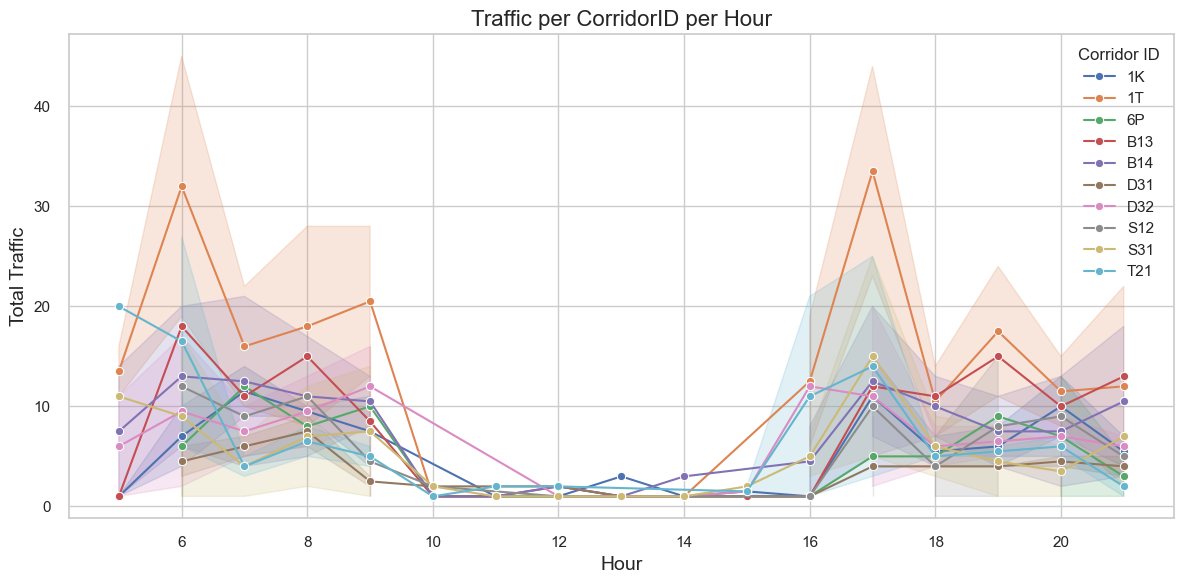

In [720]:
# Mengatur style untuk visualisasi
sns.set(style="whitegrid")

# Membuat lineplot
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=total_traffic, x='hour', y='traffic', hue='corridorID', marker='o')

# Menambahkan judul dan label
plt.title('Traffic per CorridorID per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Traffic', fontsize=14)

# Menampilkan legend
plt.legend(title='Corridor ID')

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [721]:
# Misalkan total_traffic adalah DataFrame yang berisi kolom corridorID, corridorName, direction, hour, dan traffic

# Menambahkan kolom untuk menghitung urutan per corridorID
total_traffic['new_index'] = total_traffic.groupby('corridorID').cumcount() + 1

# Menghapus kolom indeks lama jika perlu
total_traffic = total_traffic.reset_index(drop=True)

# Mengatur indeks baru sebagai kolom 'new_index'
total_traffic.set_index('new_index', inplace=True)

# Membuat dictionary untuk menyimpan DataFrame berdasarkan corridorID
dfs_by_corridor = {corridor_id: group for corridor_id, group in total_traffic.groupby('corridorID')}

# Menghitung total traffic per corridorID
total_traffic_per_corridor = total_traffic.groupby('corridorID')['traffic'].sum().reset_index()

# Mengonversi total traffic menjadi dictionary
traffic_dict = total_traffic_per_corridor.set_index('corridorID').to_dict()['traffic']

# Menampilkan dictionary dengan total traffic per corridorID
traffic_dict

# Contoh: Akses DataFrame untuk corridorID tertentu
df_1K = dfs_by_corridor['1K']
df_1T = dfs_by_corridor['1T']
df_B13 = dfs_by_corridor['B13']
df_B14 = dfs_by_corridor['B14']
df_D31 = dfs_by_corridor['D31']
df_D32 = dfs_by_corridor['D32']
df_S12 = dfs_by_corridor['S12']
df_S31 = dfs_by_corridor['S31']
df_T21 = dfs_by_corridor['T21']
df_6P = dfs_by_corridor['6P']

In [722]:
# Ekstrak jam dari tapInTime
df_royaltrans['hour'] = df_royaltrans['tapInTime'].dt.hour

# Hitung frekuensi penggunaan per jam untuk setiap corridor
peak_hours = (
    df_royaltrans.groupby(['corridorID', 'corridorName','direction','hour'])
    .size()
    .reset_index(name='traffic')
)

# Identifikasi jam dengan traffic tertinggi untuk masing-masing corridor
peak_hours = peak_hours.loc[peak_hours.groupby('corridorID')['traffic'].idxmax()]
peak_hours = peak_hours.sort_values(by='traffic', ascending=False)
peak_hours

,corridorID,corridorName,direction,hour,traffic
29,1T,Cibubur - Balai Kota,0.0,6,45
226,T21,Palem Semi - Bundaran Senayan,1.0,6,27
194,S31,Bintaro - Fatmawati,0.0,17,25
109,B14,Bekasi Barat - Kuningan,1.0,7,21
164,D32,Cinere - Bundaran Senayan,1.0,17,20
76,B13,Bekasi Barat - Blok M,0.0,6,18
7,1K,Cibubur Junction - Blok M,0.0,17,15
182,S12,BSD Serpong - Fatmawati,1.0,19,15
63,6P,Cibubur - Kuningan,0.0,20,13
123,D31,Cinere - Kuningan,0.0,8,9


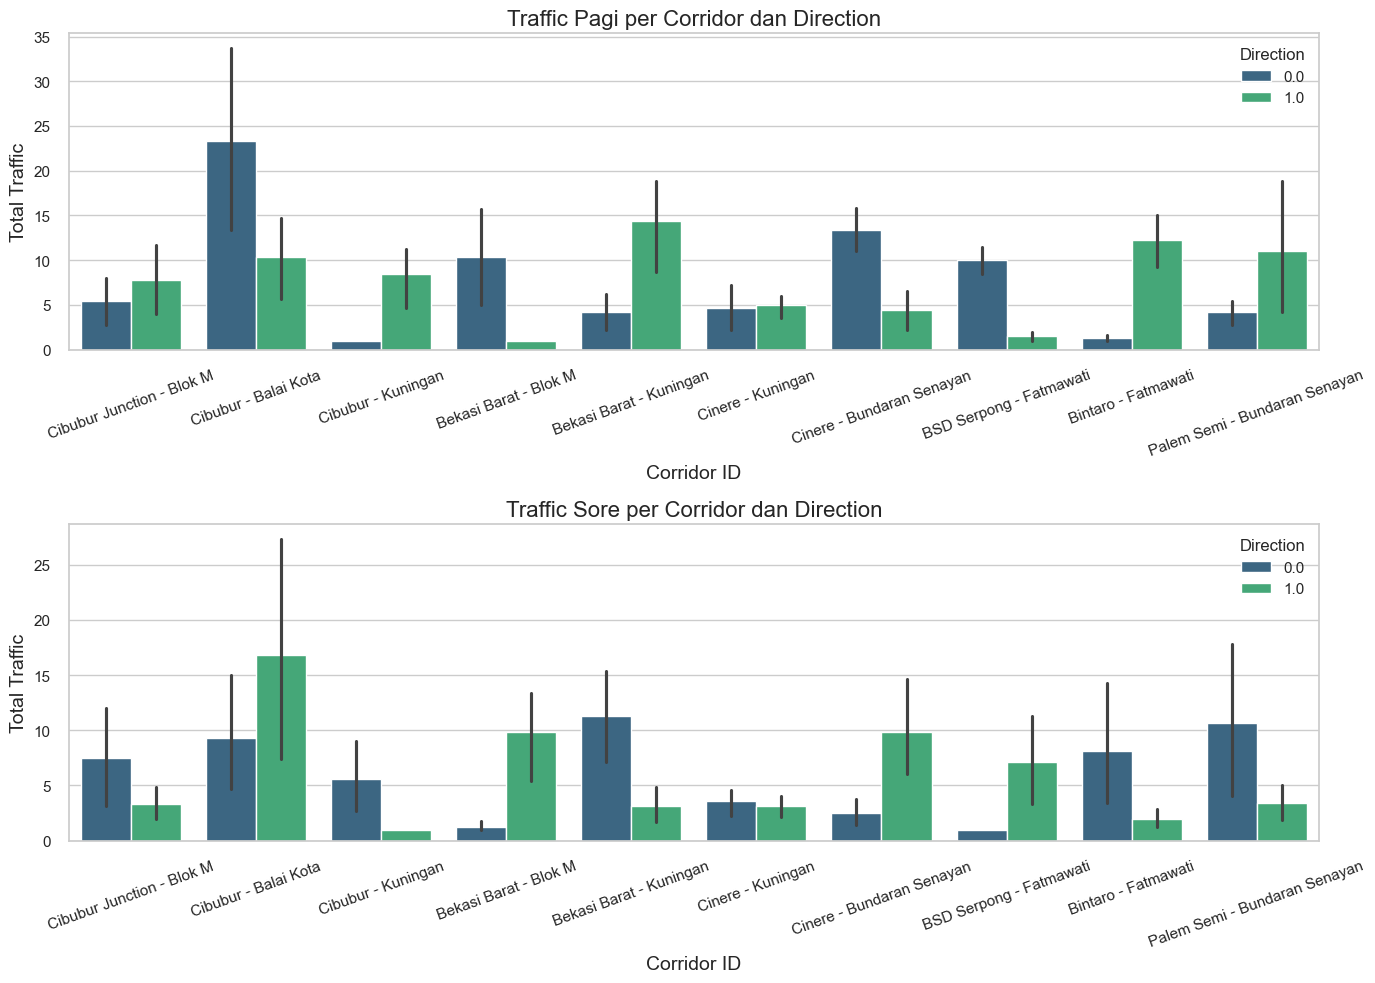

In [723]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ekstrak jam dari tapInTime
df_royaltrans['hour'] = df_royaltrans['tapInTime'].dt.hour

# Hitung frekuensi penggunaan per jam untuk setiap corridor
peak_hours = (
    df_royaltrans.groupby(['corridorID', 'corridorName', 'direction', 'hour'])
    .size()
    .reset_index(name='traffic')
)

# Membagi data berdasarkan waktu (pagi dan sore)
morning_hours = peak_hours[(peak_hours['hour'] >= 5) & (peak_hours['hour'] < 12)]
afternoon_hours = peak_hours[(peak_hours['hour'] >= 12) & (peak_hours['hour'] < 21)]

# Mengatur style untuk visualisasi
sns.set(style="whitegrid")

# Membuat figure
plt.figure(figsize=(14, 10))

# Plot untuk pagi
plt.subplot(2, 1, 1)
sns.barplot(data=morning_hours, x='corridorName', y='traffic', hue='direction', palette='viridis')
plt.title('Traffic Pagi per Corridor dan Direction', fontsize=16)
plt.xlabel('Corridor ID', fontsize=14)
plt.ylabel('Total Traffic', fontsize=14)
plt.xticks(rotation=20)
plt.legend(title='Direction')

# Plot untuk sore
plt.subplot(2, 1, 2)
sns.barplot(data=afternoon_hours, x='corridorName', y='traffic', hue='direction', palette='viridis')
plt.title('Traffic Sore per Corridor dan Direction', fontsize=16)
plt.xlabel('Corridor ID', fontsize=14)
plt.ylabel('Total Traffic', fontsize=14)
plt.xticks(rotation=20)
plt.legend(title='Direction')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [816]:
peak_hours

,corridorID,hour,traffic
79,T21,6,33
73,S31,17,30
88,T21,17,28
33,B14,6,26
43,B14,17,25
2,1K,7,23
11,1K,17,22
62,S31,6,18
50,D31,8,15
30,6P,20,14


__Pada waktu/jam pagi hari jika diasumsikan seluruh direction 0 atau berangkat lebih ramai, terdapat pada corridor berikut:__
1. Cibubur - Balai Kota
2. Bekasi Barat - Blok M
3. Cinere - Bundaran Senayan
4. BSD Serpong - Fatmawati

namun data anomali lebih banyak, yaitu direction 1 atau pulang lebih ramai, yaitu pada corridor berikut:
1. Cibubur Junction - Blok M
2. Cibubur - Kuningan
3. Bekasi Barat - Kuningan
4. Cinere - Kuningan (walaupun datanya hampir mirip direction 0 dan direction 1)
5. Bintaro - Fatmawati
6. Palem Semi - Bundaran Senayan


__Pada waktu/jam sore hari jika diasumsikan seluruh direction 1 atau pulang lebih ramai, terdapat pada corridor berikut:__
1. Cibubur - Balai Kota
2. Bekasi Barat - Blok M
3. Cinere - Bundaran Senayan
4. BSD Serpong - Fatmawati

namun data anomali lebih banyak, yaitu direction 0 atau berangkat lebih ramai, yaitu pada corridor berikut:
1. Cibubur Junction - Blok M
2. Cibubur - Kuningan
3. Bekasi Barat - Kuningan
4. Cinere - Kuningan (walaupun datanya hampir mirip direction 0 dan direction 1)
5. Bintaro - Fatmawati
6. Palem Semi - Bundaran Senayan

Melihat data ini, ada fakta menarik bahwa tiap corridor memiliki karakteristik pengguna masing-masing:
- Kelompok Pekerja Pagi ditemukan pada corridor:
1. Cibubur - Balai Kota
2. Bekasi Barat - Blok M
3. Cinere - Bundaran Senayan
4. BSD Serpong - Fatmawati

- Kelompok Pekerja Malam ditemukan pada corridor:
1. Cibubur Junction - Blok M
2. Cibubur - Kuningan
3. Bekasi Barat - Kuningan
4. Cinere - Kuningan (walaupun datanya hampir mirip direction 0 dan direction 1)
5. Bintaro - Fatmawati
6. Palem Semi - Bundaran Senayan

## __4.2 Perbaikan Jadwal per Corridor__

Sesuai dengan customer behaviour atau pola kebiasaan pengguna masing-masing corridor, maka berikut ini perbaikan jadwalnya agar dapat menyesuaikan kebutuhan pengguna / customer.

#### __4.2.1 Rekomendasi Jadwal Corridor dengan Pola Pengguna Kerja Pagi__

1. 1T: Cibubur - Balai Kota
2. B13: Bekasi Barat - Blok M
3. D32: Cinere - Bundaran Senayan
4. S12: BSD Serpong - Fatmawati

__Asumsi__
1. untuk mengurai kepadatan pengguna pada 1 peak hours, maka jadwal keberangkatan per 15 menit.
2. untuk lebih efektif, maka mengeliminasi jadwal apabila traffic kurang dari 10 orang pada 1 waktu.

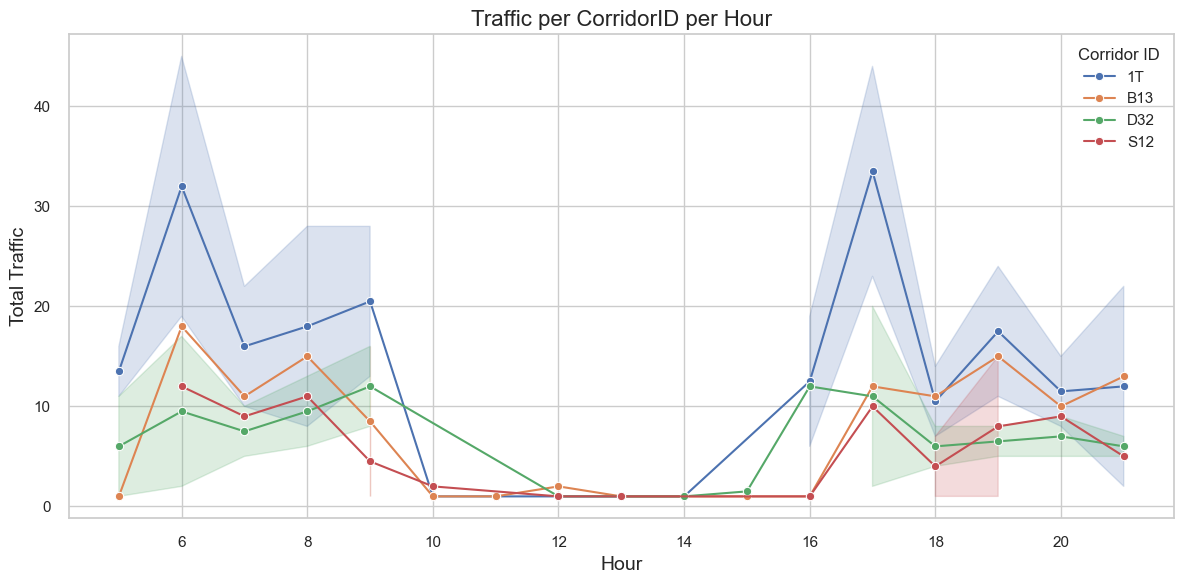

In [760]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar corridor yang ingin difilter
selected_corridors = [
    "Cibubur - Balai Kota",
    "Bekasi Barat - Blok M",
    "Cinere - Bundaran Senayan",
    "BSD Serpong - Fatmawati"
]

# Filter data berdasarkan corridor yang dipilih
filtered_traffic = total_traffic[total_traffic['corridorName'].isin(selected_corridors)]

# Mengatur style untuk visualisasi
sns.set(style="whitegrid")

# Membuat lineplot hanya untuk corridor yang dipilih
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=filtered_traffic, x='hour', y='traffic', hue='corridorID', marker='o')

# Menambahkan judul dan label
plt.title('Traffic per CorridorID per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Traffic', fontsize=14)

# Menampilkan legend
plt.legend(title='Corridor ID')

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Dari visualisasi di atas, untuk traffic per masing-masing corridor dengan pola penumpang yang sama memiliki tren peak hours yang serupa.

In [761]:
import pandas as pd

# Asumsi: filtered_traffic dan total_traffic sudah tersedia dari sebelumnya
# Buat mapping corridorID ke corridorName
corridor_name_mapping = total_traffic[['corridorID', 'corridorName']].drop_duplicates().set_index('corridorID').to_dict()['corridorName']

# Menghitung jam dengan traffic tertinggi per corridor
peak_hours = filtered_traffic.groupby(['corridorID', 'hour'])['traffic'].sum().reset_index()

# Menentukan jam puncak (misal, 2 jam dengan traffic tertinggi)
peak_hours = peak_hours.sort_values(by='traffic', ascending=False).groupby('corridorID').head(2)

# Membuat jadwal keberangkatan
schedule = []

# Interval untuk jam puncak (misal, setiap 30 menit)
peak_interval = 30  
# Interval untuk di luar jam puncak (misal, setiap 60 menit)
off_peak_interval = 60  

# Menghitung traffic rata-rata untuk membantu menentukan waktu yang tidak diambil
average_traffic = filtered_traffic.groupby('corridorID')['traffic'].mean().reset_index()

for corridor_id in peak_hours['corridorID'].unique():
    # Ambil jam puncak untuk corridor ini
    corridor_peak_hours = peak_hours[peak_hours['corridorID'] == corridor_id]['hour']
    
    # Jadwalkan keberangkatan berdasarkan jam puncak
    for hour in corridor_peak_hours:
        for minute in range(0, 60, peak_interval):
            departure_time = f"{hour:02}:{minute:02}"
            # Cek traffic untuk waktu keberangkatan
            traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
            if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                schedule.append({
                    'corridorID': corridor_id,
                    'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                    'departure_time': departure_time,
                    'direction': 0  # 0 untuk berangkat
                })
    
    # Jadwalkan di luar jam puncak
    off_peak_hours = [h for h in range(24) if h not in corridor_peak_hours]

    for hour in off_peak_hours:
        traffic_at_hour = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
        if traffic_at_hour >= average_traffic[average_traffic['corridorID'] == corridor_id]['traffic'].values[0]:  # Cek jika traffic cukup
            for minute in range(0, 60, off_peak_interval):
                departure_time = f"{hour:02}:{minute:02}"
                # Cek traffic untuk waktu keberangkatan
                traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
                if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                    schedule.append({
                        'corridorID': corridor_id,
                        'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                        'departure_time': departure_time,
                        'direction': 0  # 0 untuk berangkat
                    })

    # Menambahkan jadwal untuk pulang
    for hour in corridor_peak_hours:
        for minute in range(0, 60, peak_interval):
            departure_time = f"{hour:02}:{minute:02}"
            # Cek traffic untuk waktu keberangkatan
            traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
            if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                schedule.append({
                    'corridorID': corridor_id,
                    'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                    'departure_time': departure_time,
                    'direction': 1  # 1 untuk pulang
                })

    for hour in off_peak_hours:
        traffic_at_hour = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
        if traffic_at_hour >= average_traffic[average_traffic['corridorID'] == corridor_id]['traffic'].values[0]:  # Cek jika traffic cukup
            for minute in range(0, 60, off_peak_interval):
                departure_time = f"{hour:02}:{minute:02}"
                # Cek traffic untuk waktu keberangkatan
                traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
                if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                    schedule.append({
                        'corridorID': corridor_id,
                        'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                        'departure_time': departure_time,
                        'direction': 1  # 1 untuk pulang
                    })

# Mengubah jadwal menjadi DataFrame
schedule_df = pd.DataFrame(schedule)
schedule_df

,corridorID,corridorName,departure_time,direction
0,1T,Cibubur - Balai Kota,17:00,0
1,1T,Cibubur - Balai Kota,17:30,0
2,1T,Cibubur - Balai Kota,06:00,0
3,1T,Cibubur - Balai Kota,06:30,0
4,1T,Cibubur - Balai Kota,05:00,0
...,...,...,...,...
95,S12,BSD Serpong - Fatmawati,06:30,1
96,S12,BSD Serpong - Fatmawati,06:00,1
97,S12,BSD Serpong - Fatmawati,08:00,1
98,S12,BSD Serpong - Fatmawati,17:00,1


In [762]:
# Pastikan 'departure_time' dalam format waktu yang dapat disortir
schedule_df['departure_time'] = pd.to_datetime(schedule_df['departure_time'], format='%H:%M').dt.time

# Mengurutkan DataFrame berdasarkan corridorID, direction, dan departure_time
sorted_schedule = schedule_df.sort_values(by=['corridorID', 'direction', 'departure_time'])

Ada beberapa jadwal dengan jam yang duplikasi di corridor yang sama, maka diganti dengan jeda waktu 15 menit.

In [763]:
def adjust_duplicates(schedule_df):
    adjusted_schedule = []
    last_times = {}

    for _, row in schedule_df.iterrows():
        corridor_id = row['corridorID']
        direction = row['direction']
        current_time = pd.to_datetime(row['departure_time'].strftime('%H:%M'))  # Konversi ke datetime

        # Buat kunci untuk menyimpan waktu terakhir berdasarkan corridor dan direction
        key = (corridor_id, direction)

        if key not in last_times:
            adjusted_schedule.append(row)
            last_times[key] = current_time
        else:
            # Jika waktu saat ini sama dengan waktu terakhir
            if current_time == last_times[key]:
                # Tambahkan 15 menit
                new_time = (current_time + pd.Timedelta(minutes=15)).time()  # Kembali ke format time
                row['departure_time'] = new_time

            adjusted_schedule.append(row)
            last_times[key] = pd.to_datetime(row['departure_time'].strftime('%H:%M'))

    return pd.DataFrame(adjusted_schedule)

# Terapkan fungsi untuk menyesuaikan jadwal duplikat
adjusted_schedule_df = adjust_duplicates(sorted_schedule)

In [764]:
adjusted_schedule_df['corridorID'] = adjusted_schedule_df['corridorID'].astype(str)

# Menambahkan kolom baru untuk urutan berdasarkan corridorID
adjusted_schedule_df['new_index'] = adjusted_schedule_df.groupby('corridorID').cumcount() + 1

# Mengatur kolom baru sebagai indeks
adjusted_schedule_df.set_index('new_index', inplace=True)

In [765]:
count_df = adjusted_schedule_df.groupby(['corridorID', 'corridorName', 'direction']).size().reset_index(name='Jumlah Jadwal')
count_df

,corridorID,corridorName,direction,Jumlah Jadwal
0,1T,Cibubur - Balai Kota,0,15
1,1T,Cibubur - Balai Kota,1,15
2,B13,Bekasi Barat - Blok M,0,12
3,B13,Bekasi Barat - Blok M,1,12
4,D32,Cinere - Bundaran Senayan,0,15
5,D32,Cinere - Bundaran Senayan,1,15
6,S12,BSD Serpong - Fatmawati,0,8
7,S12,BSD Serpong - Fatmawati,1,8


In [766]:
# Hitung total jadwal keseluruhan
total_jadwal = count_df['Jumlah Jadwal'].sum()

# Tampilkan total jadwal
print("Total jadwal keseluruhan:", total_jadwal)

Total jadwal keseluruhan: 100


In [767]:
# Membuat dictionary untuk menyimpan DataFrame berdasarkan corridorID
dfs_by_corridor = {corridor_id: group for corridor_id, group in adjusted_schedule_df.groupby('corridorID')}

# Jika Anda juga ingin berdasarkan corridorName, Anda bisa melakukannya juga
dfs_by_corridor_name = {corridor_name: group for corridor_name, group in adjusted_schedule_df.groupby('corridorName')}

adjusted_schedule_df = adjusted_schedule_df.reset_index(drop=True)
adjusted_schedule_df.index = adjusted_schedule_df.index + 1  # Menambahkan 1 pada indeks

# Contoh: Akses DataFrame untuk corridorID tertentu

df_1T = dfs_by_corridor['1T']
df_B13 = dfs_by_corridor['B13']
df_D32 = dfs_by_corridor['D32']
df_S12 = dfs_by_corridor['S12']

In [768]:
df_1T

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,1T,Cibubur - Balai Kota,05:00:00,0
2,1T,Cibubur - Balai Kota,06:00:00,0
3,1T,Cibubur - Balai Kota,06:15:00,0
4,1T,Cibubur - Balai Kota,06:30:00,0
5,1T,Cibubur - Balai Kota,07:00:00,0
6,1T,Cibubur - Balai Kota,08:00:00,0
7,1T,Cibubur - Balai Kota,09:00:00,0
8,1T,Cibubur - Balai Kota,16:00:00,0
9,1T,Cibubur - Balai Kota,17:00:00,0


__Jadwal Corridor 1T: Cibubur - Balai Kota__
1. Corridor ini semula memiliki 32 jadwal menjadi 30 jadwal dengan komposisi 15 `direction` berangkat dan 15 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang

In [769]:
df_B13

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,B13,Bekasi Barat - Blok M,06:00:00,0
2,B13,Bekasi Barat - Blok M,06:15:00,0
3,B13,Bekasi Barat - Blok M,06:30:00,0
4,B13,Bekasi Barat - Blok M,07:00:00,0
5,B13,Bekasi Barat - Blok M,08:00:00,0
6,B13,Bekasi Barat - Blok M,09:00:00,0
7,B13,Bekasi Barat - Blok M,09:15:00,0
8,B13,Bekasi Barat - Blok M,09:30:00,0
9,B13,Bekasi Barat - Blok M,17:00:00,0


__Jadwal Corridor B13: Bekasi Barat - Blok M__
1. Corridor ini semula memiliki 18 jadwal menjadi 32 jadwal dengan komposisi 12 `direction` berangkat dan 12 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang

In [770]:
df_D32

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,D32,Cinere - Bundaran Senayan,05:00:00,0
2,D32,Cinere - Bundaran Senayan,06:00:00,0
3,D32,Cinere - Bundaran Senayan,07:00:00,0
4,D32,Cinere - Bundaran Senayan,08:00:00,0
5,D32,Cinere - Bundaran Senayan,09:00:00,0
6,D32,Cinere - Bundaran Senayan,09:15:00,0
7,D32,Cinere - Bundaran Senayan,09:30:00,0
8,D32,Cinere - Bundaran Senayan,16:00:00,0
9,D32,Cinere - Bundaran Senayan,17:00:00,0


__Jadwal Corridor D32: Cinere - Bundaran Senayan__
1. Corridor ini semula memiliki 25 jadwal menjadi 30 jadwal dengan komposisi 15 `direction` berangkat dan 15 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang

In [771]:
df_S12

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,S12,BSD Serpong - Fatmawati,06:00:00,0
2,S12,BSD Serpong - Fatmawati,06:15:00,0
3,S12,BSD Serpong - Fatmawati,06:30:00,0
4,S12,BSD Serpong - Fatmawati,08:00:00,0
5,S12,BSD Serpong - Fatmawati,17:00:00,0
6,S12,BSD Serpong - Fatmawati,19:00:00,0
7,S12,BSD Serpong - Fatmawati,19:15:00,0
8,S12,BSD Serpong - Fatmawati,19:30:00,0
9,S12,BSD Serpong - Fatmawati,06:00:00,1


__Jadwal Corridor S12: BSD Serpong - Fatmawati__
1. Corridor ini semula memiliki 26 jadwal menjadi 16 jadwal dengan komposisi 8 `direction` berangkat dan 8 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang

#### __4.2.2 Rekomendasi Jadwal Corridor dengan Pola Pengguna Kerja Malam__

1. 1K: Cibubur Junction - Blok M
2. 6P: Cibubur - Kuningan
3. B14: Bekasi Barat - Kuningan
4. D31: Cinere - Kuningan
5. S31: Bintaro - Fatmawati
6. T21: Palem Semi - Bundaran Senayan

__Asumsi__
1. untuk mengurai kepadatan pengguna pada 1 peak hours, maka jadwal keberangkatan per 15 menit.
2. untuk lebih efektif, maka mengeliminasi jadwal apabila traffic kurang dari 10 orang pada 1 waktu.

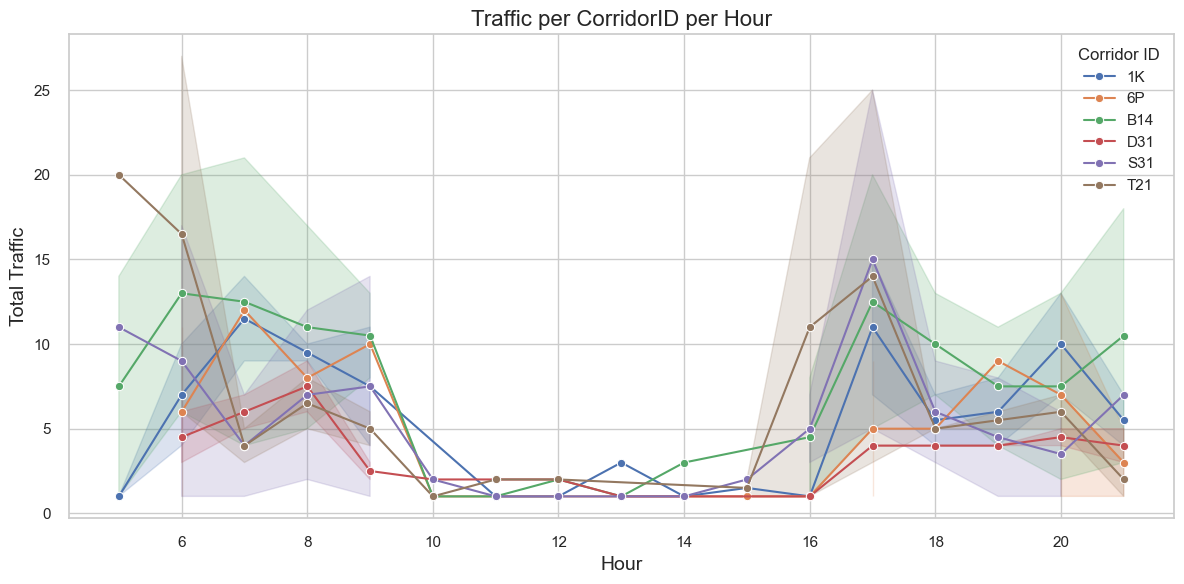

In [784]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar corridor yang ingin difilter
selected_corridors = [
    "Cibubur Junction - Blok M",
    "Cibubur - Kuningan",
    "Bekasi Barat - Kuningan",
    "Cinere - Kuningan",
    "Bintaro - Fatmawati",
    "Palem Semi - Bundaran Senayan",
]

# Filter data berdasarkan corridor yang dipilih
filtered_traffic = total_traffic[total_traffic['corridorName'].isin(selected_corridors)]

# Mengatur style untuk visualisasi
sns.set(style="whitegrid")

# Membuat lineplot hanya untuk corridor yang dipilih
plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=filtered_traffic, x='hour', y='traffic', hue='corridorID', marker='o')

# Menambahkan judul dan label
plt.title('Traffic per CorridorID per Hour', fontsize=16)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Traffic', fontsize=14)

# Menampilkan legend
plt.legend(title='Corridor ID')

# Menampilkan plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dari visualisasi di atas, untuk traffic per masing-masing corridor dengan pola penumpang yang sama memiliki tren peak hours yang serupa.

In [785]:
corridor_name_mapping = total_traffic[['corridorID', 'corridorName']].drop_duplicates().set_index('corridorID').to_dict()['corridorName']

# Menghitung jam dengan traffic tertinggi per corridor
peak_hours = filtered_traffic.groupby(['corridorID', 'hour'])['traffic'].sum().reset_index()

# Menentukan jam puncak (misal, 2 jam dengan traffic tertinggi)
peak_hours = peak_hours.sort_values(by='traffic', ascending=False).groupby('corridorID').head(2)

# Membuat jadwal keberangkatan
schedule = []

# Interval untuk jam puncak (misal, setiap 30 menit)
peak_interval = 30  
# Interval untuk di luar jam puncak (misal, setiap 60 menit)
off_peak_interval = 60  

# Menghitung traffic rata-rata untuk membantu menentukan waktu yang tidak diambil
average_traffic = filtered_traffic.groupby('corridorID')['traffic'].mean().reset_index()

for corridor_id in peak_hours['corridorID'].unique():
    # Ambil jam puncak untuk corridor ini
    corridor_peak_hours = peak_hours[peak_hours['corridorID'] == corridor_id]['hour']
    
    # Jadwalkan keberangkatan berdasarkan jam puncak
    for hour in corridor_peak_hours:
        for minute in range(0, 60, peak_interval):
            departure_time = f"{hour:02}:{minute:02}"
            # Cek traffic untuk waktu keberangkatan
            traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
            if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                schedule.append({
                    'corridorID': corridor_id,
                    'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                    'departure_time': departure_time,
                    'direction': 0  # 0 untuk berangkat
                })
    
    # Jadwalkan di luar jam puncak
    off_peak_hours = [h for h in range(24) if h not in corridor_peak_hours]

    for hour in off_peak_hours:
        traffic_at_hour = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
        if traffic_at_hour >= average_traffic[average_traffic['corridorID'] == corridor_id]['traffic'].values[0]:  # Cek jika traffic cukup
            for minute in range(0, 60, off_peak_interval):
                departure_time = f"{hour:02}:{minute:02}"
                # Cek traffic untuk waktu keberangkatan
                traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
                if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                    schedule.append({
                        'corridorID': corridor_id,
                        'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                        'departure_time': departure_time,
                        'direction': 0  # 0 untuk berangkat
                    })

    # Menambahkan jadwal untuk pulang
    for hour in corridor_peak_hours:
        for minute in range(0, 60, peak_interval):
            departure_time = f"{hour:02}:{minute:02}"
            # Cek traffic untuk waktu keberangkatan
            traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
            if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                schedule.append({
                    'corridorID': corridor_id,
                    'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                    'departure_time': departure_time,
                    'direction': 1  # 1 untuk pulang
                })

    for hour in off_peak_hours:
        traffic_at_hour = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
        if traffic_at_hour >= average_traffic[average_traffic['corridorID'] == corridor_id]['traffic'].values[0]:  # Cek jika traffic cukup
            for minute in range(0, 60, off_peak_interval):
                departure_time = f"{hour:02}:{minute:02}"
                # Cek traffic untuk waktu keberangkatan
                traffic_at_time = filtered_traffic[(filtered_traffic['corridorID'] == corridor_id) & (filtered_traffic['hour'] == hour)]['traffic'].sum()
                if traffic_at_time >= 10:  # Hanya tambahkan jika traffic >= 10
                    schedule.append({
                        'corridorID': corridor_id,
                        'corridorName': corridor_name_mapping[corridor_id],  # Menambahkan corridorName
                        'departure_time': departure_time,
                        'direction': 1  # 1 untuk pulang
                    })

# Mengubah jadwal menjadi DataFrame
schedule_df = pd.DataFrame(schedule)

In [786]:
# Mengurutkan DataFrame berdasarkan corridorID, direction, dan departure_time
sorted_schedule = schedule_df.sort_values(by=['corridorID', 'direction', 'departure_time'])
sorted_schedule

,corridorID,corridorName,departure_time,direction
80,1K,Cibubur Junction - Blok M,06:00,0
76,1K,Cibubur Junction - Blok M,07:00,0
81,1K,Cibubur Junction - Blok M,07:00,0
77,1K,Cibubur Junction - Blok M,07:30,0
82,1K,Cibubur Junction - Blok M,08:00,0
...,...,...,...,...
22,T21,Palem Semi - Bundaran Senayan,17:00,1
16,T21,Palem Semi - Bundaran Senayan,17:30,1
23,T21,Palem Semi - Bundaran Senayan,18:00,1
24,T21,Palem Semi - Bundaran Senayan,19:00,1


In [787]:
import pandas as pd

def adjust_duplicates(schedule_df):
    adjusted_schedule = []
    last_times = {}

    # Pastikan departure_time adalah datetime
    schedule_df['departure_time'] = pd.to_datetime(schedule_df['departure_time'], format='%H:%M')

    for _, row in schedule_df.iterrows():
        corridor_id = row['corridorID']
        direction = row['direction']
        current_time = row['departure_time']  # Sudah dalam format datetime

        # Buat kunci untuk menyimpan waktu terakhir berdasarkan corridor dan direction
        key = (corridor_id, direction)

        if key not in last_times:
            adjusted_schedule.append(row)
            last_times[key] = current_time
        else:
            # Jika waktu saat ini sama dengan waktu terakhir
            if current_time == last_times[key]:
                # Tambahkan 15 menit
                new_time = current_time + pd.Timedelta(minutes=15)  # Tetap dalam format datetime
                row['departure_time'] = new_time

            adjusted_schedule.append(row)
            last_times[key] = row['departure_time']  # Simpan waktu yang sudah disesuaikan

    adjusted_schedule_df = pd.DataFrame(adjusted_schedule)

    # Mengonversi departure_time kembali ke format string HH:MM
    adjusted_schedule_df['departure_time'] = adjusted_schedule_df['departure_time'].dt.strftime('%H:%M')

    return adjusted_schedule_df

# Terapkan fungsi untuk menyesuaikan jadwal duplikat
adjusted_schedule_df = adjust_duplicates(sorted_schedule)
adjusted_schedule_df


,corridorID,corridorName,departure_time,direction
80,1K,Cibubur Junction - Blok M,06:00,0
76,1K,Cibubur Junction - Blok M,07:00,0
81,1K,Cibubur Junction - Blok M,07:15,0
77,1K,Cibubur Junction - Blok M,07:30,0
82,1K,Cibubur Junction - Blok M,08:00,0
...,...,...,...,...
22,T21,Palem Semi - Bundaran Senayan,17:15,1
16,T21,Palem Semi - Bundaran Senayan,17:30,1
23,T21,Palem Semi - Bundaran Senayan,18:00,1
24,T21,Palem Semi - Bundaran Senayan,19:00,1


In [788]:
adjusted_schedule_df['corridorID'] = adjusted_schedule_df['corridorID'].astype(str)

# Menambahkan kolom baru untuk urutan berdasarkan corridorID
adjusted_schedule_df['new_index'] = adjusted_schedule_df.groupby('corridorID').cumcount() + 1

# Mengatur kolom baru sebagai indeks
adjusted_schedule_df.set_index('new_index', inplace=True)
adjusted_schedule_df

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,1K,Cibubur Junction - Blok M,06:00,0
2,1K,Cibubur Junction - Blok M,07:00,0
3,1K,Cibubur Junction - Blok M,07:15,0
4,1K,Cibubur Junction - Blok M,07:30,0
5,1K,Cibubur Junction - Blok M,08:00,0
...,...,...,...,...
22,T21,Palem Semi - Bundaran Senayan,17:15,1
23,T21,Palem Semi - Bundaran Senayan,17:30,1
24,T21,Palem Semi - Bundaran Senayan,18:00,1


In [789]:
count_df = adjusted_schedule_df.groupby(['corridorID', 'corridorName', 'direction']).size().reset_index(name='Jumlah Jadwal')
count_df

,corridorID,corridorName,direction,Jumlah Jadwal
0,1K,Cibubur Junction - Blok M,0,13
1,1K,Cibubur Junction - Blok M,1,13
2,6P,Cibubur - Kuningan,0,8
3,6P,Cibubur - Kuningan,1,8
4,B14,Bekasi Barat - Kuningan,0,14
5,B14,Bekasi Barat - Kuningan,1,14
6,D31,Cinere - Kuningan,0,6
7,D31,Cinere - Kuningan,1,6
8,S31,Bintaro - Fatmawati,0,11
9,S31,Bintaro - Fatmawati,1,11


In [790]:
# Hitung total jadwal keseluruhan
total_jadwal = count_df['Jumlah Jadwal'].sum()

# Tampilkan total jadwal
print("Total jadwal keseluruhan:", total_jadwal)

Total jadwal keseluruhan: 130


In [791]:
# Membuat dictionary untuk menyimpan DataFrame berdasarkan corridorID
dfs_by_corridor = {corridor_id: group for corridor_id, group in adjusted_schedule_df.groupby('corridorID')}

# Jika Anda juga ingin berdasarkan corridorName, Anda bisa melakukannya juga
dfs_by_corridor_name = {corridor_name: group for corridor_name, group in adjusted_schedule_df.groupby('corridorName')}

adjusted_schedule_df = adjusted_schedule_df.reset_index(drop=True)
adjusted_schedule_df.index = adjusted_schedule_df.index + 1  # Menambahkan 1 pada indeks

# Contoh: Akses DataFrame untuk corridorID tertentu

df_1K = dfs_by_corridor['1K']
df_6P = dfs_by_corridor['6P']
df_B14 = dfs_by_corridor['B14']
df_D31 = dfs_by_corridor['D31']
df_S31 = dfs_by_corridor['S31']
df_T21 = dfs_by_corridor['T21']

In [792]:
df_1K

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,1K,Cibubur Junction - Blok M,06:00,0
2,1K,Cibubur Junction - Blok M,07:00,0
3,1K,Cibubur Junction - Blok M,07:15,0
4,1K,Cibubur Junction - Blok M,07:30,0
5,1K,Cibubur Junction - Blok M,08:00,0
6,1K,Cibubur Junction - Blok M,09:00,0
7,1K,Cibubur Junction - Blok M,17:00,0
8,1K,Cibubur Junction - Blok M,17:15,0
9,1K,Cibubur Junction - Blok M,17:30,0


__Jadwal Corridor 1K: Cibubur Junction - Blok M__
1. Corridor ini semula memiliki 12 jadwal menjadi 26 jadwal dengan komposisi 13 `direction` berangkat dan 13 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang

In [793]:
df_6P

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,6P,Cibubur - Kuningan,06:00,0
2,6P,Cibubur - Kuningan,07:00,0
3,6P,Cibubur - Kuningan,07:15,0
4,6P,Cibubur - Kuningan,07:30,0
5,6P,Cibubur - Kuningan,09:00,0
6,6P,Cibubur - Kuningan,20:00,0
7,6P,Cibubur - Kuningan,20:15,0
8,6P,Cibubur - Kuningan,20:30,0
9,6P,Cibubur - Kuningan,06:00,1


__Jadwal Corridor 6P: Cibubur - Kuningan__
1. Corridor ini semula memiliki 3 jadwal menjadi 16 jadwal dengan komposisi 8 `direction` berangkat dan 8 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang.

In [794]:
df_B14

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,B14,Bekasi Barat - Kuningan,05:00,0
2,B14,Bekasi Barat - Kuningan,06:00,0
3,B14,Bekasi Barat - Kuningan,06:15,0
4,B14,Bekasi Barat - Kuningan,06:30,0
5,B14,Bekasi Barat - Kuningan,07:00,0
6,B14,Bekasi Barat - Kuningan,08:00,0
7,B14,Bekasi Barat - Kuningan,09:00,0
8,B14,Bekasi Barat - Kuningan,17:00,0
9,B14,Bekasi Barat - Kuningan,17:15,0


__Jadwal Corridor B14 : Bekasi Barat - Kuningan__
1. Corridor ini semula memiliki 10 jadwal menjadi 28 jadwal dengan komposisi 14 `direction` berangkat dan 14 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang.

In [795]:
df_D31

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,D31,Cinere - Kuningan,07:00,0
2,D31,Cinere - Kuningan,07:15,0
3,D31,Cinere - Kuningan,07:30,0
4,D31,Cinere - Kuningan,08:00,0
5,D31,Cinere - Kuningan,08:15,0
6,D31,Cinere - Kuningan,08:30,0
7,D31,Cinere - Kuningan,07:00,1
8,D31,Cinere - Kuningan,07:15,1
9,D31,Cinere - Kuningan,07:30,1


__Jadwal Corridor D31: Cinere - Kuningan__
1. Corridor ini semula memiliki 2 jadwal menjadi 12 jadwal dengan komposisi 6 `direction` berangkat dan 6 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang.

In [796]:
df_S31

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,S31,Bintaro - Fatmawati,05:00,0
2,S31,Bintaro - Fatmawati,06:00,0
3,S31,Bintaro - Fatmawati,06:15,0
4,S31,Bintaro - Fatmawati,06:30,0
5,S31,Bintaro - Fatmawati,08:00,0
6,S31,Bintaro - Fatmawati,09:00,0
7,S31,Bintaro - Fatmawati,16:00,0
8,S31,Bintaro - Fatmawati,17:00,0
9,S31,Bintaro - Fatmawati,17:15,0


__Jadwal Corridor S31: Bintaro - Fatmawati__
1. Corridor ini semula memiliki 36 jadwal menjadi 22 jadwal dengan komposisi 11 `direction` berangkat dan 11 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang.

In [797]:
df_T21

,corridorID,corridorName,departure_time,direction
new_index,,,,
1,T21,Palem Semi - Bundaran Senayan,05:00,0
2,T21,Palem Semi - Bundaran Senayan,06:00,0
3,T21,Palem Semi - Bundaran Senayan,06:15,0
4,T21,Palem Semi - Bundaran Senayan,06:30,0
5,T21,Palem Semi - Bundaran Senayan,08:00,0
6,T21,Palem Semi - Bundaran Senayan,09:00,0
7,T21,Palem Semi - Bundaran Senayan,16:00,0
8,T21,Palem Semi - Bundaran Senayan,17:00,0
9,T21,Palem Semi - Bundaran Senayan,17:15,0


__Jadwal Corridor T21: Palem Semi - Bundaran Senayan__
1. Corridor ini semula memiliki 15 jadwal menjadi 26 jadwal dengan komposisi 13 `direction` berangkat dan 13 `direction` arah kembali / pulang.
2. Jadwal jam sudah disesuaikan dengan traffic pengguna, diharapkan 1x keberangkatan untuk 1 bus tidak kurang dari 10 penumpang.

# 5. Penutup

Sesuai pola dan kebutuhan dari pengguna moda Royaltrans per `corridorID` / `corridorName`, berikut perbaikan jadwal yang dapat digunakan untuk mengakomodir traffic pengguna.

| corridorID | corridorName                  | direction | Jumlah Jadwal Sebelum | Jumlah Jadwal Sesudah |
|------------|--------------------------------|-----------|------------------------|------------------------|
| 1K         | Cibubur Junction - Blok M     | 0         | 2                      | 13                     |
| 1K         | Cibubur Junction - Blok M     | 1         | 10                     | 13                     |
| 1T         | Cibubur - Balai Kota          | 0         | 10                     | 15                     |
| 1T         | Cibubur - Balai Kota          | 1         | 22                     | 15                     |
| 6P         | Cibubur - Kuningan            | 0         | 5                      | 8                      |
| 6P         | Cibubur - Kuningan            | 1         | 3                      | 8                      |
| B13        | Bekasi Barat - Blok M         | 0         | 10                     | 12                     |
| B13        | Bekasi Barat - Blok M         | 1         | 9                      | 12                     |
| B14        | Bekasi Barat - Kuningan       | 0         | 1                      | 14                      |
| B14        | Bekasi Barat - Kuningan       | 1         | 9                      | 14                      |
| D31        | Cinere - Kuningan             | 0         | 2                      | 6                      |
| D31        | Cinere - Kuningan             | 1         | 2                      | 0                      |
| D32        | Cinere - Bundaran Senayan     | 0         | 12                     | 15                     |
| D32        | Cinere - Bundaran Senayan     | 1         | 13                     | 15                     |
| S12        | BSD Serpong - Fatmawati       | 0         | 12                     | 8                      |
| S12        | BSD Serpong - Fatmawati       | 1         | 14                     | 8                      |
| S31        | Bintaro - Fatmawati           | 0         | 19                     | 11                     |
| S31        | Bintaro - Fatmawati           | 1         | 17                     | 11                     |
| T21        | Palem Semi - Bundaran Senayan | 0         | 0                     | 13                     |
| T21        | Palem Semi - Bundaran Senayan | 1         | 15                     | 13                     |


Jadwal ini dapat dievaluasi pada masa yang akan datang apabila terjadi perubahan kembali pada pola pengguna Royaltrans per corridor.

In [803]:
df_royaltrans.to_excel('df_royaltrans.xlsx', index=False)

In [807]:
df_royaltrans.to_csv('df_royaltrans.csv', index=False)

In [802]:
total_traffic.to_excel('total_traffic.xlsx', index=False)

In [815]:
total_traffic.to_csv('total_traffic.csv', index=False)

In [804]:
usage_by_hour.to_excel('usage_by_hour.xlsx', index=False)

In [808]:
usage_by_hour.to_csv('usage_by_hour.csv', index=False)

In [805]:
peak_hours.to_excel('peak_hours.xlsx', index=False)

In [811]:
peak_hours.to_csv('peak_hours.csv', index=False)

In [806]:
route_usage.to_excel('route_usage.xlsx', index=False)

In [810]:
route_usage.to_csv('route_usage.csv', index=False)

In [817]:
routeMap.to_csv('routeMap.csv', index=False)